In [1]:
import numpy as np
import pandas as pd
import re, string
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

# A. Exploratory Data Analysis

In [2]:
def read_data(file, info=True):
    try:
        df = pd.read_csv(file)
        if info:
            print('\n', "="*10+"LOADING DATA"+"="*10)
            print("Data reading is complete!")

            print('\n', "="*10+"DIMENSIONS"+"="*10)
            print("Number of Observations = ", df.shape[0])
            print("Number of Columns = ", df.shape[1],'\n')
            
            print('\n', "="*10+"DTYPES"+"="*10)
            if len(df.select_dtypes("object").columns) > 0:
                print('Number of Object variables = ', 
                      len(df.select_dtypes("object").columns))
            if len(df.select_dtypes("integer").columns) > 0:
                print('Number of Integer variables = ', 
                      len(df.select_dtypes("integer").columns))
            if len(df.select_dtypes("float").columns) > 0:
                print('Number of Float variables = ', 
                      len(df.select_dtypes("float").columns))
            if len(df.select_dtypes("bool").columns) > 0:
                print('Number of Boolean variables = ', 
                      len(df.select_dtypes("bool").columns))
                
            print('\n', "="*10+"MISSING VALUES"+"="*10)
            print(np.where(df.isnull().values.any() == False, 
                           "No missing value! Proceed to next steps..."
                           , "Data includes missing value! Analyze missing values"))
            
        return df
    except:
        print('Data did not import!')


# df = read_data('case_study_data.csv',info=True)
# df.head(2)
df = read_data(r'/Users/my_MAC/Coding/data/Training Dataset/case_study_data.csv',info=True)


 ==========LOADING DATA==========
Data reading is complete!

 ==========DIMENSIONS==========
Number of Observations =  268343
Number of Columns =  3 


 ==========DTYPES==========
Number of Object variables =  2
Number of Integer variables =  1

 ==========MISSING VALUES==========
No missing value! Proceed to next steps...


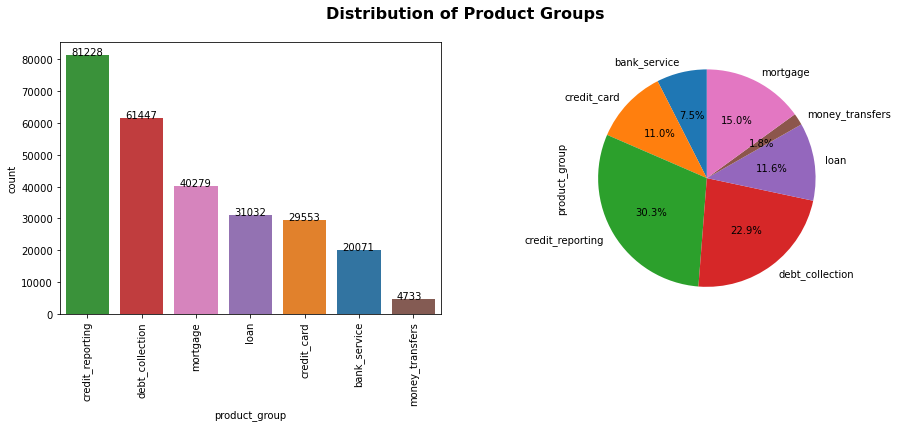

In [5]:
def plot_counts(df, var, axs):
    my_palette = {"bank_service": "tab:blue", "credit_card": "tab:orange", "credit_reporting":"tab:green",
                  "debt_collection":"tab:red", "loan":"tab:purple" ,"money_transfers":"tab:brown" ,
                  "mortgage":"tab:pink"
                 }
    chart = sns.countplot(x=df[var],order = df[var].value_counts().index,ax=axs, palette=my_palette)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    for p, label in zip(axs.patches, df[var].value_counts()):
        axs.annotate(label, (p.get_x()+0.1, p.get_height()+1));
        
fig, axs =plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Distribution of Product Groups', weight='bold', size=16)

plot_counts(df, 'product_group', axs[0])
df.groupby('product_group')['product_group'].count().plot.pie(
    startangle=90, autopct="%.1f%%", ax=axs[1]);

In [3]:
df_nlp = df.copy()

# Create Features
df_nlp['length'] = df_nlp['text'].apply(len)
df_nlp['num_words'] = df_nlp['text'].str.split(' ').apply(len)
df_nlp['masked_XX'] = df_nlp['text'].str.split(' ').apply(lambda xx: sum(1 for w in xx if 'XX' in w.upper()))
df_nlp['caps_letter'] = df_nlp['text'].apply(lambda capsL: sum(1 for c in capsL if c.isupper()))
df_nlp['caps_word'] = df_nlp['text'].apply(lambda capsW : sum(1 for c in capsW.split() if c.isupper()))
df_nlp['exclaimations'] = df_nlp['text'].apply(lambda exclaim : exclaim.count('!'))
df_nlp['questions'] = df_nlp['text'].apply(lambda questions : questions.count('?'))
df_nlp['punct'] = df_nlp['text'].apply(lambda punct: sum(punct.count(p) for p in string.punctuation))
df_nlp['sp_char'] = df_nlp['text'].apply(lambda sp_char: sum(sp_char.count(s) for s in '@#$%^*()-'))
df_nlp['unique_words'] = df_nlp['text'].apply(lambda text: len(set(w for w in text.split())))



# Manipulate to find ratios
df_nlp['capsL_to_length'] = df_nlp['caps_letter'] / df_nlp['length']
df_nlp['capsW_to_length'] = df_nlp['caps_word'] / df_nlp['length']
df_nlp['capsW_to_words'] = df_nlp['caps_word'] / df_nlp['num_words']
df_nlp['unique_to_words'] = df_nlp['unique_words']/df_nlp['num_words']
df_nlp['masked_to_words'] = df_nlp['masked_XX']/df_nlp['num_words']

In [14]:
df_nlp.describe(exclude=['O'], percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

complaint_id    length  num_words  masked_XX  caps_letter  caps_word  \
count     268343.00 268343.00  268343.00  268343.00    268343.00  268343.00   
mean     2306798.18   1081.07     199.01      10.28        85.08      21.72   
std       491031.14   1149.47     210.26      19.97       168.19      37.33   
min      1290155.00      5.00       1.00       0.00         0.00       0.00   
5%       1418536.20    131.00      24.00       0.00         4.00       1.00   
10%      1539735.80    203.00      37.00       0.00         7.00       2.00   
25%      1907122.50    392.00      72.00       2.00        19.00       6.00   
50%      2413685.00    746.00     138.00       5.00        45.00      13.00   
75%      2738736.00   1372.00     254.00      12.00        95.00      26.00   
90%      2872481.80   2363.00     435.00      24.00       186.00      47.00   
95%      2919233.90   3236.90     594.00      36.00       277.00      68.00   
99%      2967016.90   4757.00     876.58      77.00       651.00     145.00   
max      2995824.00  31735.00    6320.00    1811.00     24835.00    5644.00   

       exclaimations  questions     punct   sp_char  unique_words  \
count      268343.00  268343.00 268343.00 268343.00     268343.00   
mean            0.31       0.22     28.09      3.77        104.92   
std             2.18       1.25     40.07     10.43         78.19   
min             0.00       0.00      0.00      0.00          1.00   
5%              0.00       0.00      2.00      0.00         20.00   
10%             0.00       0.00      3.00      0.00         30.00   
25%             0.00       0.00      8.00      0.00         51.00   
50%             0.00       0.00     17.00      1.00         86.00   
75%             0.00       0.00     35.00      4.00        137.00   
90%             1.00       1.00     64.00     10.00        205.00   
95%             2.00       1.00     89.00     15.00        258.00   
99%             6.00       4.00    159.00     33.00        348.00   
max           368.00     342.00   5229.00   1518.00       1839.00   

       capsL_to_length  capsW_to_length  capsW_to_words  unique_to_words  \
count        268343.00        268343.00       268343.00        268343.00   
mean              0.08             0.02            0.11             0.64   
std               0.11             0.02            0.13             0.21   
min               0.00             0.00            0.00             0.01   
5%                0.01             0.00            0.02             0.41   
10%               0.02             0.01            0.04             0.45   
25%               0.03             0.01            0.06             0.53   
50%               0.06             0.02            0.09             0.63   
75%               0.09             0.02            0.12             0.73   
90%               0.14             0.03            0.18             0.84   
95%               0.21             0.05            0.25             0.91   
99%               0.78             0.17            0.97             1.00   
max               0.93             0.26           10.00            74.00   

       masked_to_words  
count        268343.00  
mean              0.05  
std               0.07  
min               0.00  
5%                0.00  
10%               0.00  
25%               0.01  
50%               0.04  
75%               0.07  
90%               0.12  
95%               0.16  
99%               0.33  
max               1.00

In [15]:
df_nlp.describe(exclude=['O']).T

count       mean       std        min        25%  \
complaint_id    268343.00 2306798.18 491031.14 1290155.00 1907122.50   
length          268343.00    1081.07   1149.47       5.00     392.00   
num_words       268343.00     199.01    210.26       1.00      72.00   
masked_XX       268343.00      10.28     19.97       0.00       2.00   
caps_letter     268343.00      85.08    168.19       0.00      19.00   
caps_word       268343.00      21.72     37.33       0.00       6.00   
exclaimations   268343.00       0.31      2.18       0.00       0.00   
questions       268343.00       0.22      1.25       0.00       0.00   
punct           268343.00      28.09     40.07       0.00       8.00   
sp_char         268343.00       3.77     10.43       0.00       0.00   
unique_words    268343.00     104.92     78.19       1.00      51.00   
capsL_to_length 268343.00       0.08      0.11       0.00       0.03   
capsW_to_length 268343.00       0.02      0.02       0.00       0.01   
capsW_to_words  268343.00       0.11      0.13       0.00       0.06   
unique_to_words 268343.00       0.64      0.21       0.01       0.53   
masked_to_words 268343.00       0.05      0.07       0.00       0.01   

                       50%        75%        max  
complaint_id    2413685.00 2738736.00 2995824.00  
length              746.00    1372.00   31735.00  
num_words           138.00     254.00    6320.00  
masked_XX             5.00      12.00    1811.00  
caps_letter          45.00      95.00   24835.00  
caps_word            13.00      26.00    5644.00  
exclaimations         0.00       0.00     368.00  
questions             0.00       0.00     342.00  
punct                17.00      35.00    5229.00  
sp_char               1.00       4.00    1518.00  
unique_words         86.00     137.00    1839.00  
capsL_to_length       0.06       0.09       0.93  
capsW_to_length       0.02       0.02       0.26  
capsW_to_words        0.09       0.12      10.00  
unique_to_words       0.63       0.73      74.00  
masked_to_words       0.04       0.07       1.00

In [6]:
def explore_features(feature, threshold):
    
    df_feature = df_nlp.loc[df_nlp[feature] > threshold]
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    print(bold_start+ "{} : ".format(feature) + bold_end + 
          "{} Percentage of records are with more than {} {} in train data and the count is {}".format(
              round(len(df_feature)/len(df_nlp)*100,2), threshold, feature, len(df_feature)))

In [7]:
# Using manually selected thresholds for CUSTOM FEATURES
for (i,j) in zip(['sp_char', 'exclaimations', 'questions', 'punct', 'masked_XX'],[15,5,5,75, 25]):
    explore_features(i, j)

sp_char : 4.8 Percentage of records are with more than 15 sp_char in train data and the count is 12890
exclaimations : 1.19 Percentage of records are with more than 5 exclaimations in train data and the count is 3194
questions : 0.56 Percentage of records are with more than 5 questions in train data and the count is 1495
punct : 7.22 Percentage of records are with more than 75 punct in train data and the count is 19370
masked_XX : 9.27 Percentage of records are with more than 25 masked_XX in train data and the count is 24872


In [8]:
# Using manually selected thresholds for BASIC FEATURES
for i,j in zip(['length', 'num_words', 'caps_word', 'unique_words'],[3500, 600, 70, 300]):
    explore_features(i, j)

length : 4.03 Percentage of records are with more than 3500 length in train data and the count is 10810
num_words : 4.86 Percentage of records are with more than 600 num_words in train data and the count is 13041
caps_word : 4.58 Percentage of records are with more than 70 caps_word in train data and the count is 12282
unique_words : 2.36 Percentage of records are with more than 300 unique_words in train data and the count is 6331


In [9]:
# Using manually selected thresholds for DERIVED RATIO FEATURES
for i,j in zip(['unique_to_words','capsL_to_length','capsW_to_words', 'masked_to_words'],
               [ 0.90, 0.20,0.25,0.15]):
    explore_features(i, j)

unique_to_words : 5.39 Percentage of records are with more than 0.9 unique_to_words in train data and the count is 14473
capsL_to_length : 5.29 Percentage of records are with more than 0.2 capsL_to_length in train data and the count is 14185
capsW_to_words : 5.07 Percentage of records are with more than 0.25 capsW_to_words in train data and the count is 13609
masked_to_words : 5.71 Percentage of records are with more than 0.15 masked_to_words in train data and the count is 15314


In [10]:
import warnings
warnings.filterwarnings('ignore')

def visualize_features(feature, threshold, X='product_group',):
    # Filter any extreme values
    _df = df_nlp[df_nlp[feature] <= threshold]
    
    f, axs = plt.subplots(1,2,figsize=(20,6))
    f.suptitle("Distribution of " + feature, weight='bold', size=16)
    
    my_palette = {"bank_service": "tab:blue", "credit_card": "tab:orange", "credit_reporting":"tab:green",
                  "debt_collection":"tab:red", "loan":"tab:purple" ,"money_transfers":"tab:brown" ,
                  "mortgage":"tab:pink"
                 }
    
    # Create Boxplot
    chart_ = sns.boxplot(x = X, y = feature, data = _df, ax=axs[0], palette=my_palette);
    chart_.set_xticklabels(chart_.get_xticklabels(),rotation=30)
    
    # Create Density plot
    for (i,j) in zip(df_nlp.product_group.unique(),my_palette.keys()):
        var = _df[_df.product_group == i][feature]
        sns.distplot(var, hist=False, label=i, ax=axs[1], fit_kws={"color":my_palette[j]})
        axs[1].legend()
    plt.show()

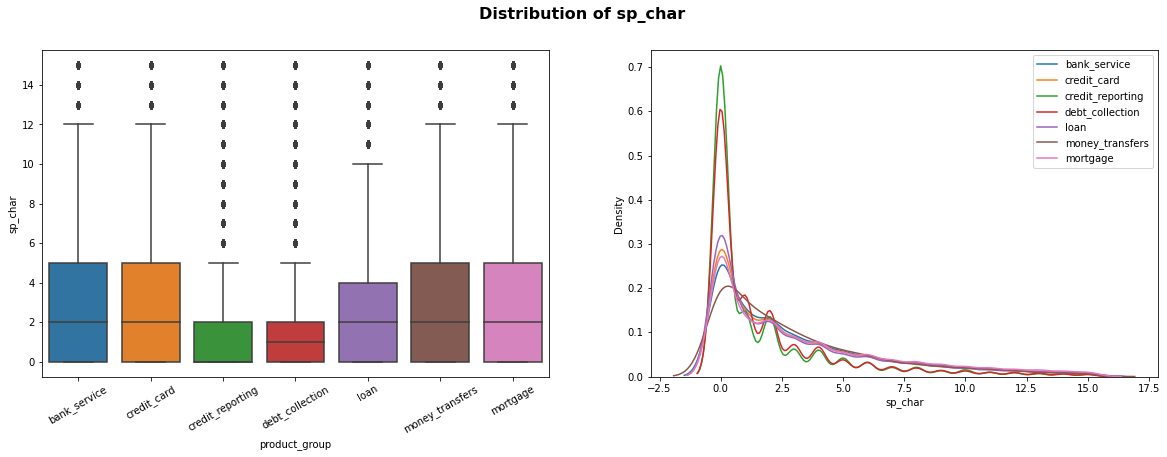

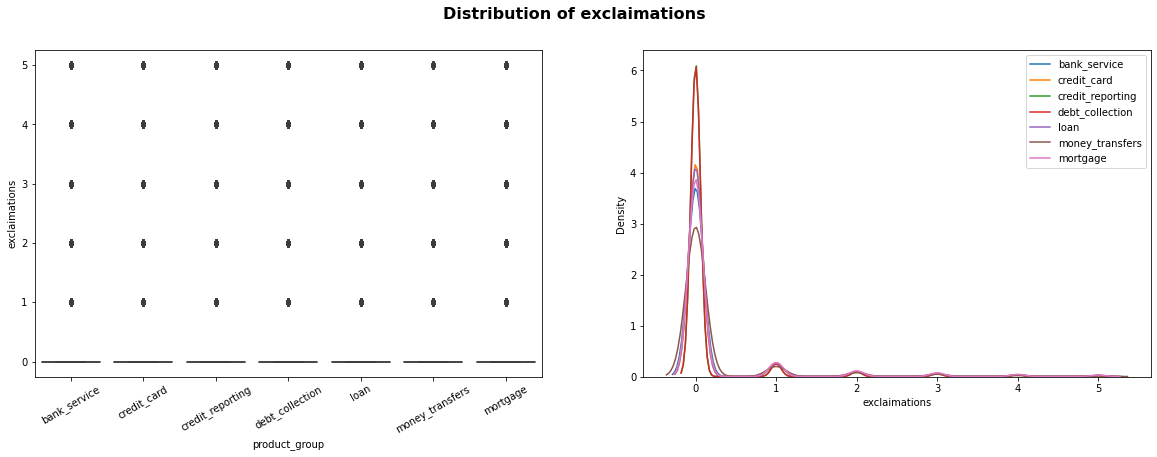

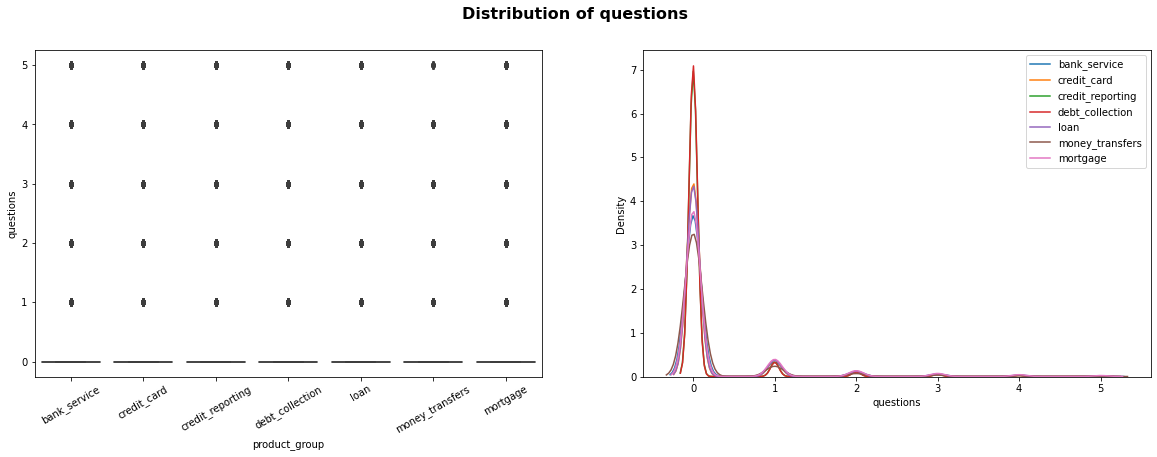

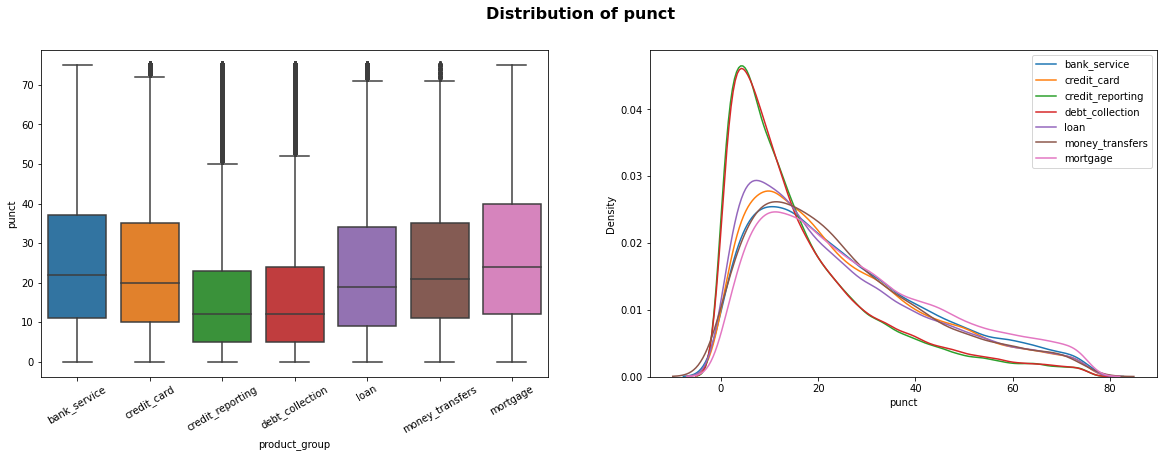

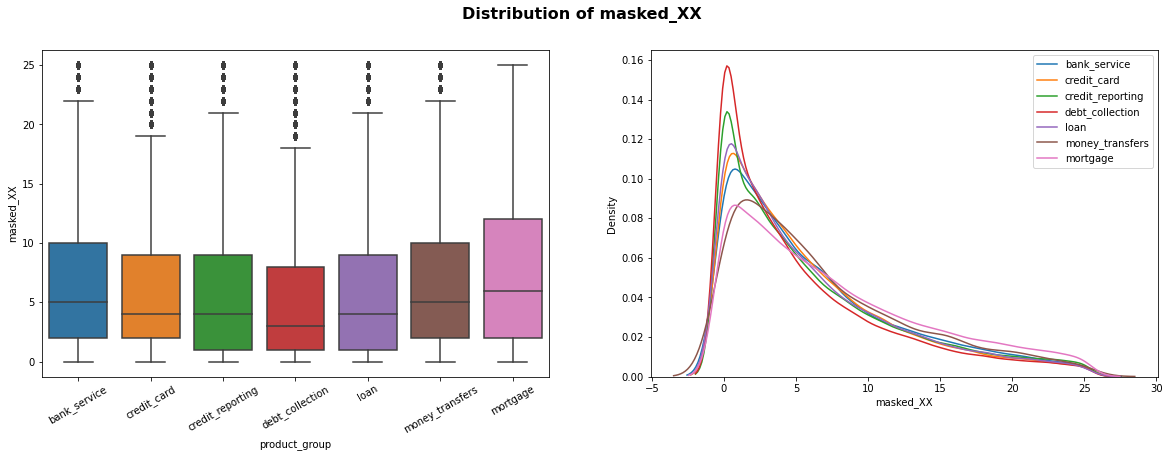

In [11]:
for (i,j) in zip(['sp_char', 'exclaimations', 'questions', 'punct', 'masked_XX'],[15,5,5,75,25]):
    visualize_features(i, j)

In [ ]:
"""
sp_char :  No variation among different product groups - No information contained
exclaimations : too few to be valuable
questions : too few to be valuable
punct : distribution of punctuations varies across groups - will keep the counts, but remove in TEXT PROCESSING
masked_XX : 'Mortgage' has higest median and 'Debt_collection' has lowest median - varies across groups
            - will keep the counts, but remove in TEXT PROCESSING
"""

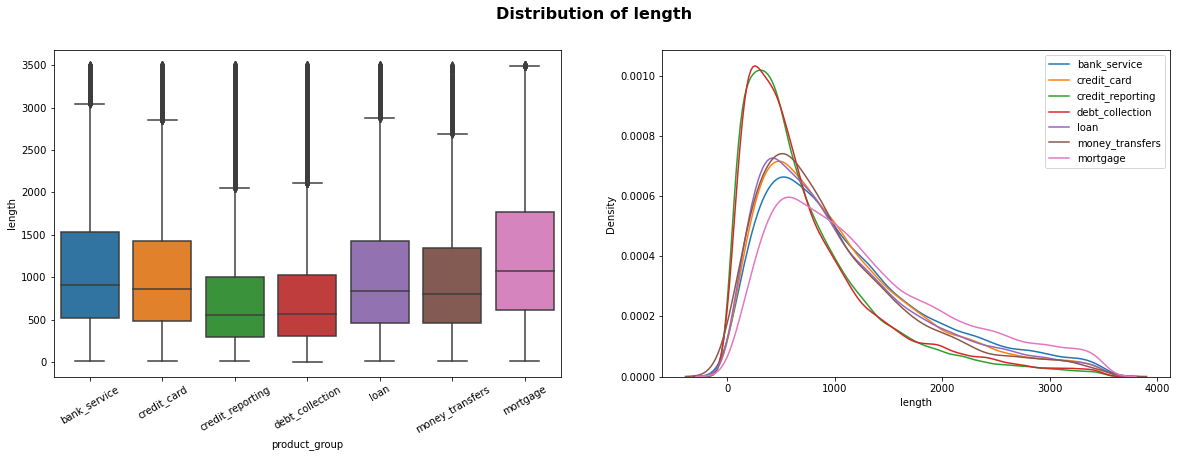

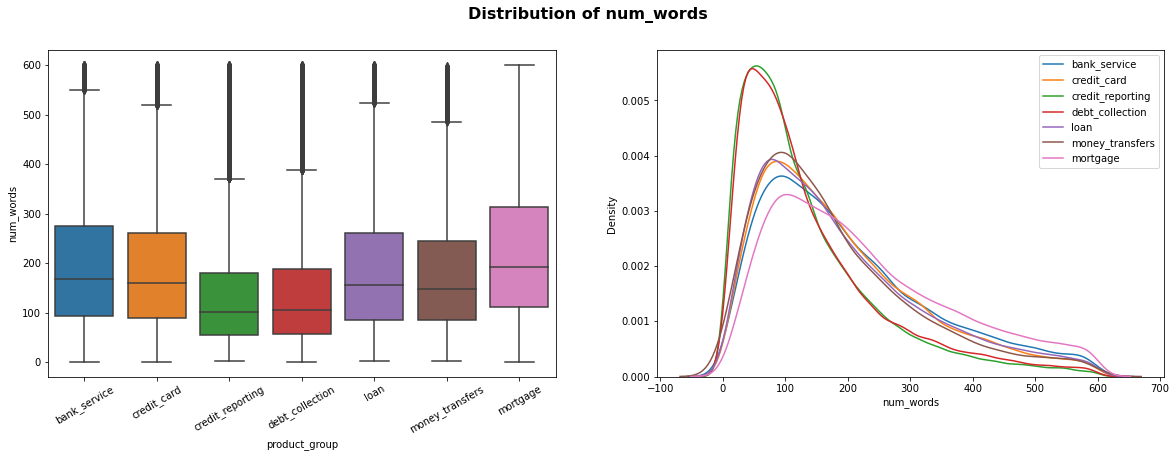

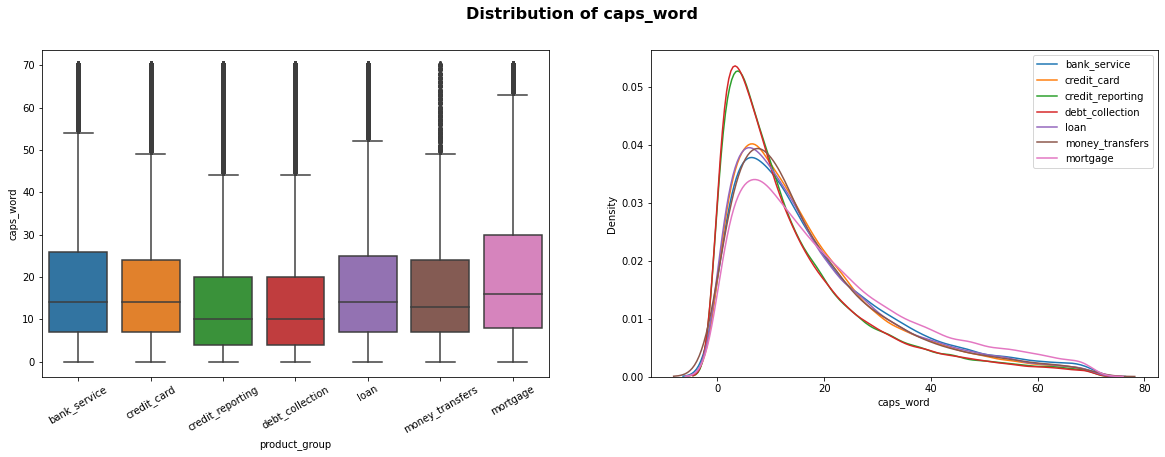

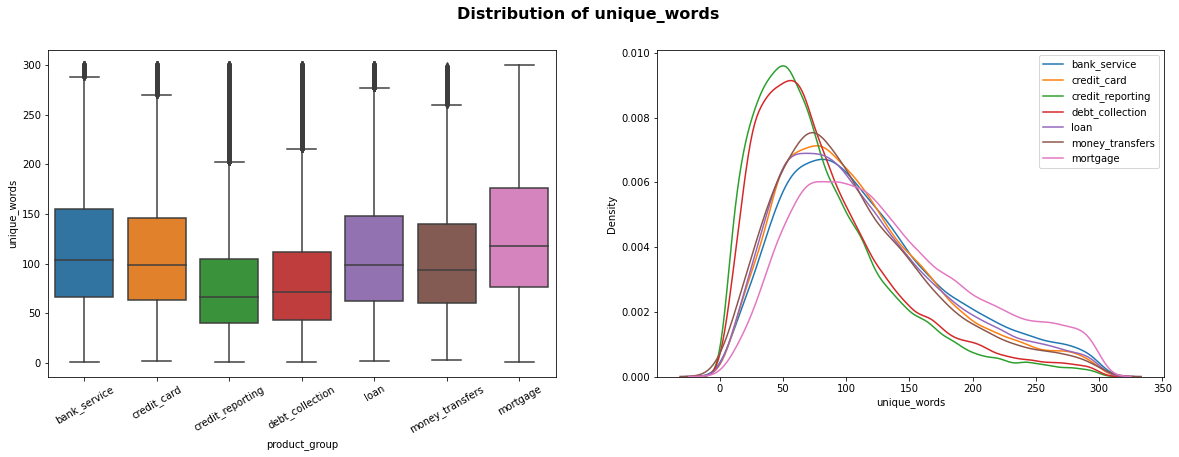

In [13]:
for i,j in zip(['length', 'num_words', 'caps_word', 'unique_words'],[3500, 600, 70, 300]):
    visualize_features(i, j)

In [ ]:
"""
All of these features varies across groups. However, these features may have high correlation
Next step : Check correlation and discard features

"""

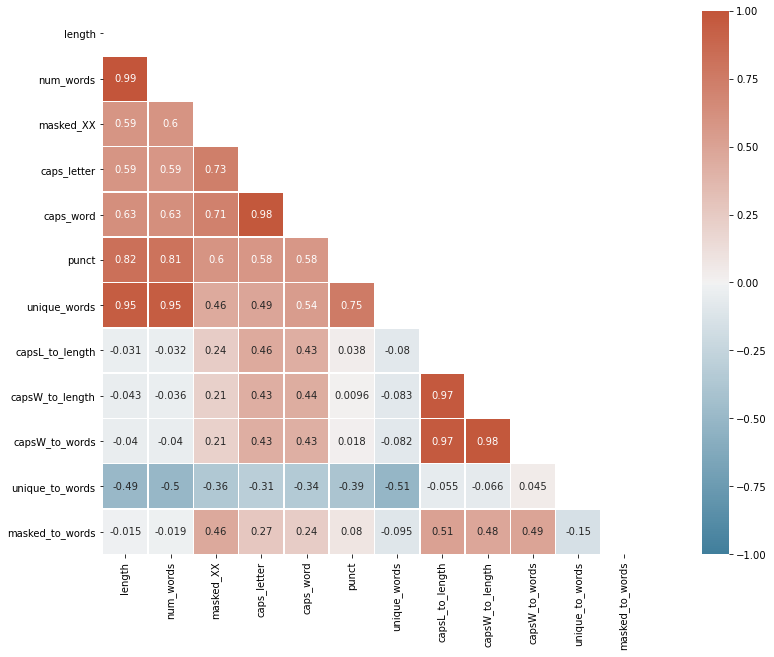

In [14]:
# dropping 'QUESTIONS' and 'EXCLAIMATIONS' as they are too few to be useful
# dropping 'SP_CHAR' as there is very little variation / information

correlation_matrix = df_nlp.drop(columns=['complaint_id','questions','exclaimations','sp_char']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5,
            vmin=-1, vmax=1, annot=True);

In [ ]:
"""
1. "Length", "num_words" and "unique_words" - turned out to be most information in ditribution
2. "capsW_to_words" have very small correlation with "Length", "num_words" and "unique_words"
3. Same is true for "masked_to_words"
4. But "unique_to_words" shows higher correlation
5. Also, as expected "Length" is highly correlated with "num_words" and "unique_words"
    , as "num_words" is highly correlated with "unique_words" as well 
6. massed_xx and masked_to_words are also potential features
    
Conclusion:

Although these features look interesting, we will now move to NLP 
as the focus of the project is to analyze text data

"""

# B. Text Processing

In [3]:
# for next steps we will only keep few columns
df_text = df.copy()

In [4]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import chi2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import nltk
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

import gensim

# B. I. Before Text Cleaning - Just Exploring

In [ ]:
"""
First, we will explore the corpus before preprocessing or cleaning
This will give a broader idea of the underlying data

We will explore explore most and least frequent data

We already saw in EDA the punctuation or special characters are not useful, 
therefore will remove in text cleaning stage
"""

In [15]:
total_corpus = [i.split() for i in df_text['text'].values]

In [17]:
len(total_corpus)

268343

In [16]:
total_corpus_word = [w for sublist in total_corpus for w in sublist]
unique_corpus_word = list(set(total_corpus_word))
print("total words = ", len(total_corpus_word), "total unique words = ", len(unique_corpus_word))

total words =  52848489 total unique words =  285139


In [22]:
df_text['length'] = df_text['text'].str.split(' ').apply(len)
print('Mean number of words in document = ',df_text['length'].mean())

Mean number of words in document =  199.00576500970772


In [ ]:
"""
Now we will look at most frequent words in corpus
"""

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

def create_ngrams(text, ngram, top_n_words):
    text = text.apply(lambda x: np.str_(x))
    cv = CountVectorizer(ngram_range=(ngram, ngram)).fit(text)
    bag_of_words = cv.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    words_freq = [(w, sum_of_words[0, i]) for w, i in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_n_words], dict(words_freq[:top_n_words])

In [71]:
_, unigram = create_ngrams(df_text['text'],1,50)
_, bigram = create_ngrams(df_text['text'],2,50)
_, trigram = create_ngrams(df_text['text'],3,50)

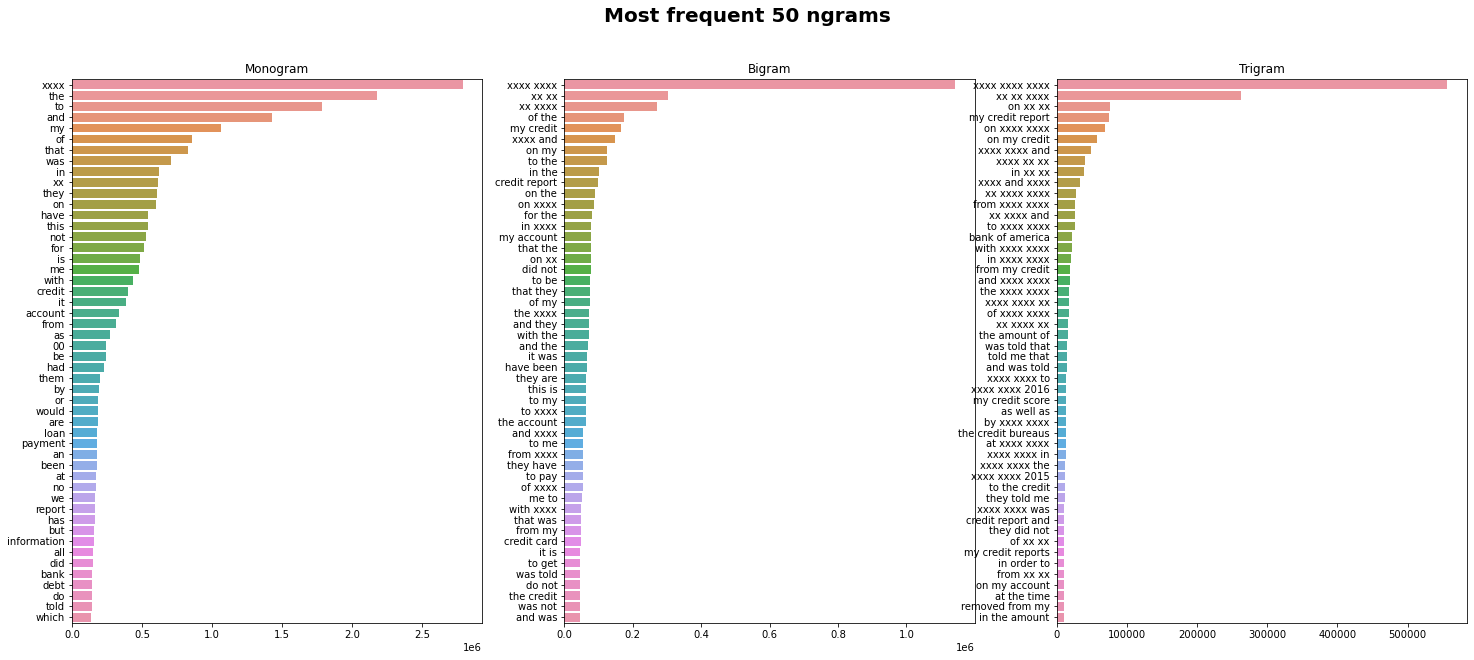

In [72]:
fig, axs = plt.subplots(1,3,figsize = (25,10))
fig.suptitle("Most frequent 50 ngrams", weight='bold', size=20)
sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');

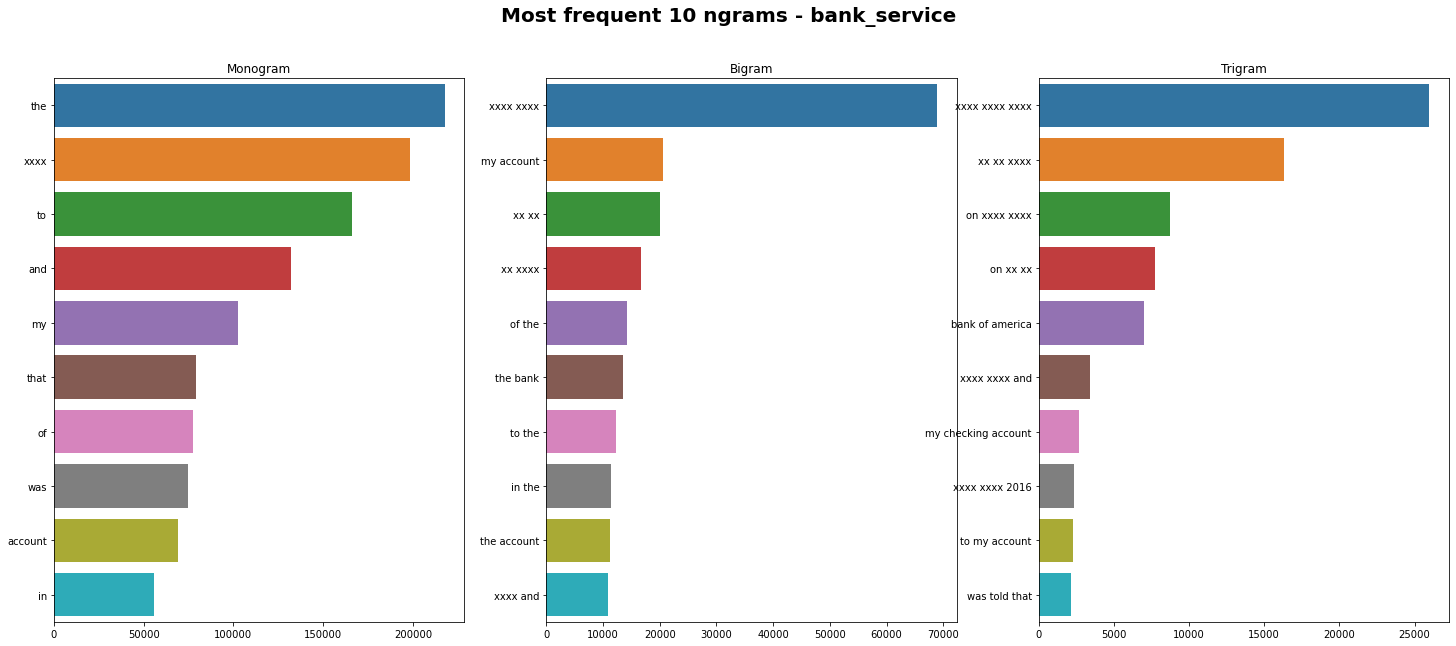

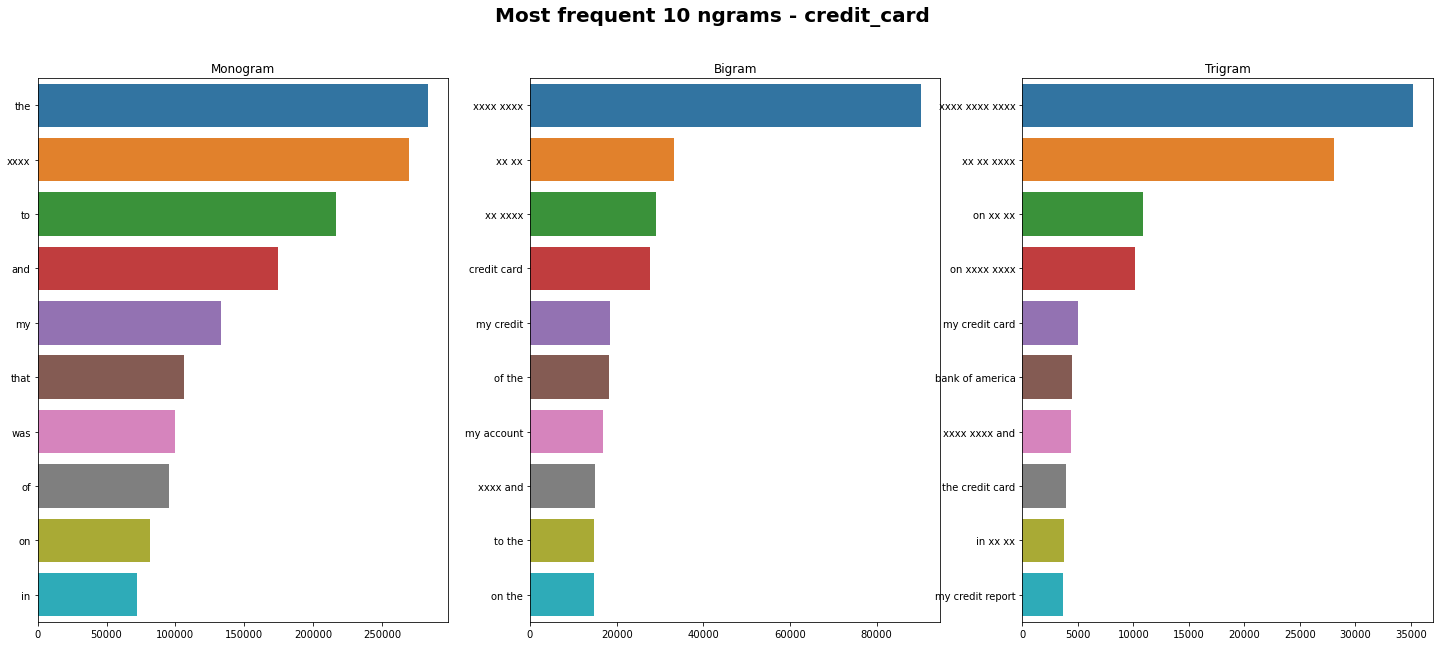

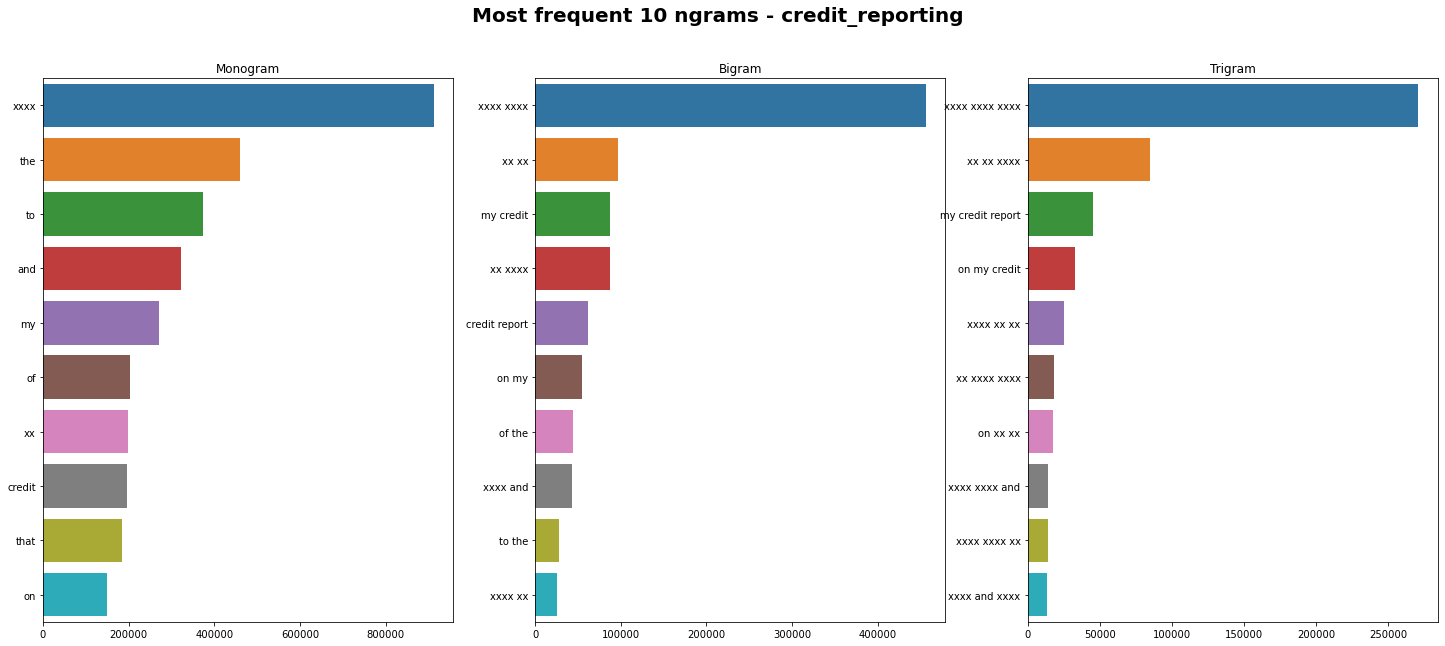

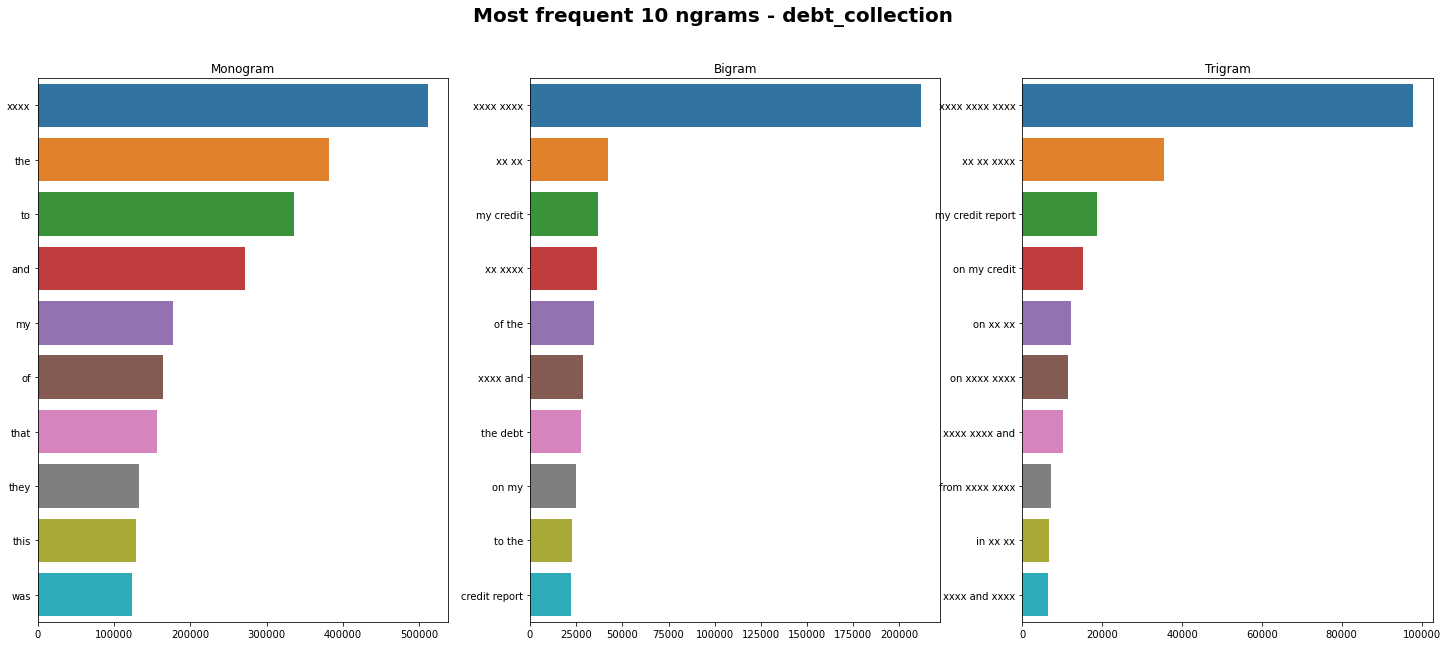

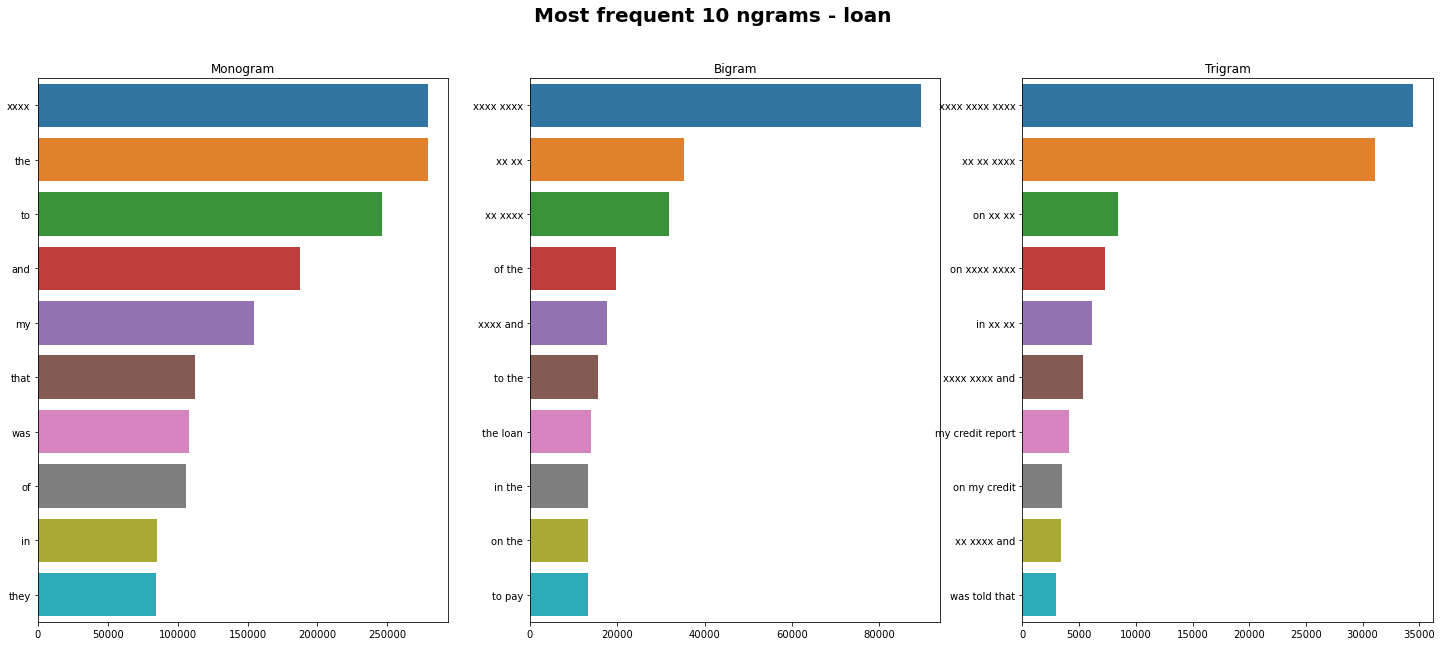

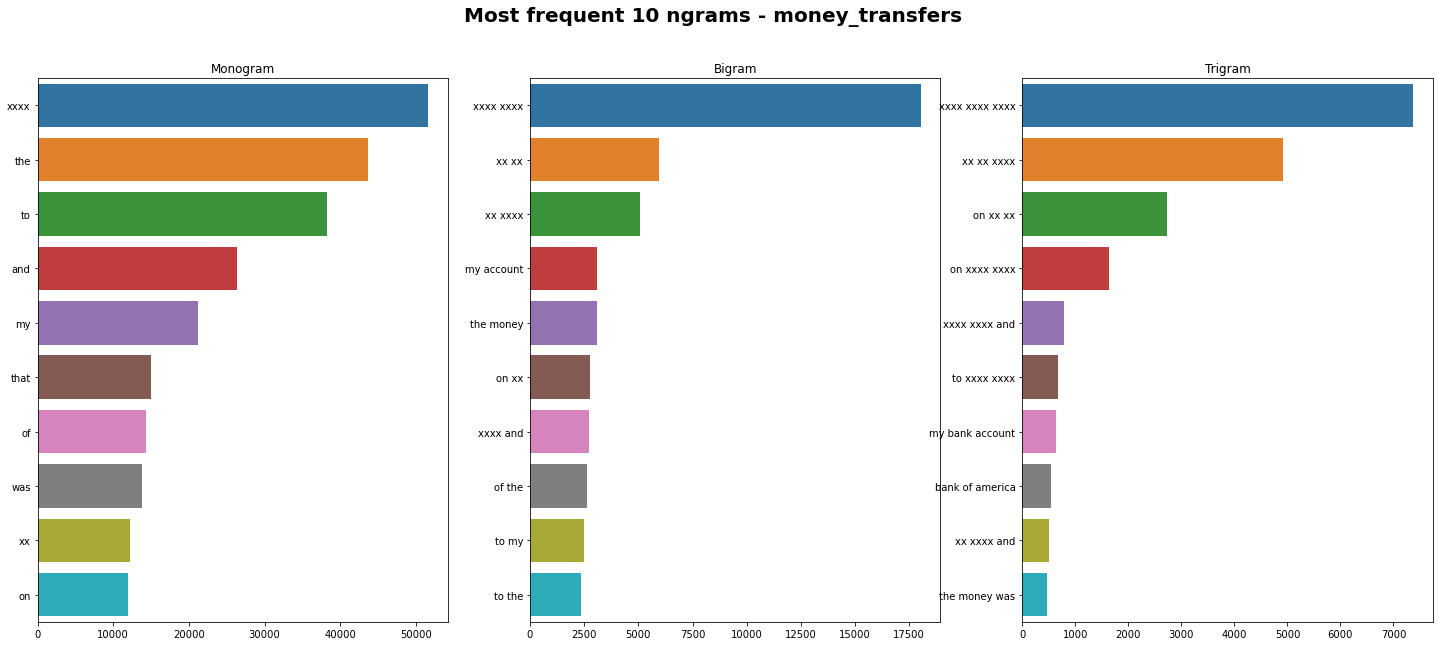

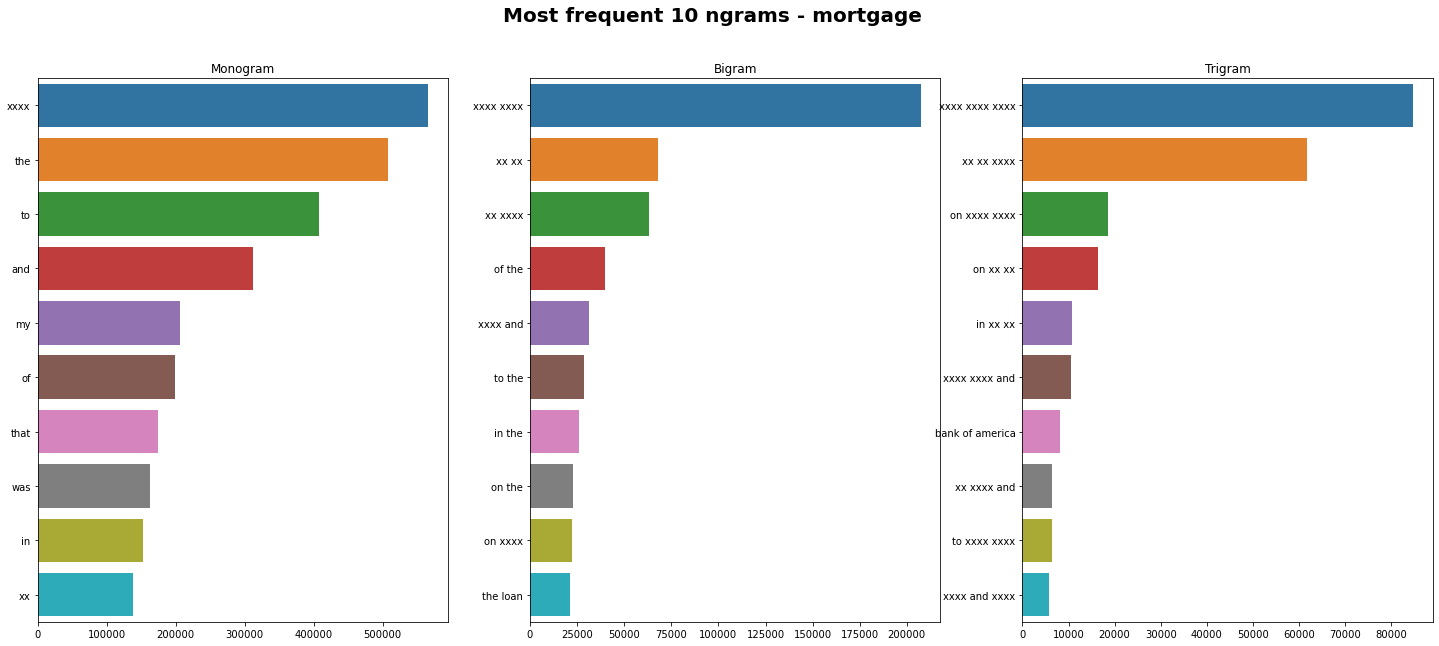

In [73]:
def most_freq_word(df, n=10, show_top_n=True):
    _, unigram = create_ngrams(df['text'],1,n)
    _, bigram = create_ngrams(df['text'],2,n)
    _, trigram = create_ngrams(df['text'],3,n)
    
    if show_top_n:
        fig, axs = plt.subplots(1,3,figsize = (25,10))
        fig.suptitle("Most frequent %d ngrams - " %n + i, weight='bold', size=20)
        sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
        sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
        sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');
    
    return unigram, bigram, trigram
    
for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    _,_,_ = most_freq_word(_df)

most_freq_monogram = {}
most_freq_bigram = {}
most_freq_trigram = {}

for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    m,b,t = most_freq_word(_df, n=1000, show_top_n=False)
    m_word = list(m.keys())
    b_word = list(b.keys())
    t_word = list(t.keys())
    most_freq_monogram[i] = m_word
    most_freq_bigram[i] = b_word
    most_freq_trigram[i] = t_word

most_freq_monogram = pd.DataFrame(most_freq_monogram)
most_freq_bigram = pd.DataFrame(most_freq_bigram)
most_freq_trigram = pd.DataFrame(most_freq_trigram)

In [74]:
most_freq_monogram.head()

bank_service credit_card credit_reporting debt_collection  loan  \
0          the         the             xxxx            xxxx  xxxx   
1         xxxx        xxxx              the             the   the   
2           to          to               to              to    to   
3          and         and              and             and   and   
4           my          my               my              my    my   

  money_transfers mortgage  
0            xxxx     xxxx  
1             the      the  
2              to       to  
3             and      and  
4              my       my

In [75]:
most_freq_bigram.head()

bank_service  credit_card credit_reporting debt_collection       loan  \
0    xxxx xxxx    xxxx xxxx        xxxx xxxx       xxxx xxxx  xxxx xxxx   
1   my account        xx xx            xx xx           xx xx      xx xx   
2        xx xx      xx xxxx        my credit       my credit    xx xxxx   
3      xx xxxx  credit card          xx xxxx         xx xxxx     of the   
4       of the    my credit    credit report          of the   xxxx and   

  money_transfers   mortgage  
0       xxxx xxxx  xxxx xxxx  
1           xx xx      xx xx  
2         xx xxxx    xx xxxx  
3      my account     of the  
4       the money   xxxx and

In [76]:
most_freq_trigram.head()

bank_service     credit_card  credit_reporting   debt_collection  \
0   xxxx xxxx xxxx  xxxx xxxx xxxx    xxxx xxxx xxxx    xxxx xxxx xxxx   
1       xx xx xxxx      xx xx xxxx        xx xx xxxx        xx xx xxxx   
2     on xxxx xxxx        on xx xx  my credit report  my credit report   
3         on xx xx    on xxxx xxxx      on my credit      on my credit   
4  bank of america  my credit card        xxxx xx xx          on xx xx   

             loan money_transfers        mortgage  
0  xxxx xxxx xxxx  xxxx xxxx xxxx  xxxx xxxx xxxx  
1      xx xx xxxx      xx xx xxxx      xx xx xxxx  
2        on xx xx        on xx xx    on xxxx xxxx  
3    on xxxx xxxx    on xxxx xxxx        on xx xx  
4        in xx xx   xxxx xxxx and        in xx xx

In [ ]:
"""
Next - will explore least frequent ngrams in corpus
"""

In [17]:
def create_ngrams2(text, ngram, top_n_words):
    text = text.apply(lambda x: np.str_(x))
    cv = CountVectorizer(ngram_range=(ngram, ngram)).fit(text)
    bag_of_words = cv.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    words_freq = [(w, sum_of_words[0, i]) for w, i in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1])
    
    return words_freq[:top_n_words], dict(words_freq[:top_n_words])

In [78]:
_, unigram = create_ngrams2(df_text['text'],1,50)
_, bigram = create_ngrams2(df_text['text'],2,50)
_, trigram = create_ngrams2(df_text['text'],3,50)

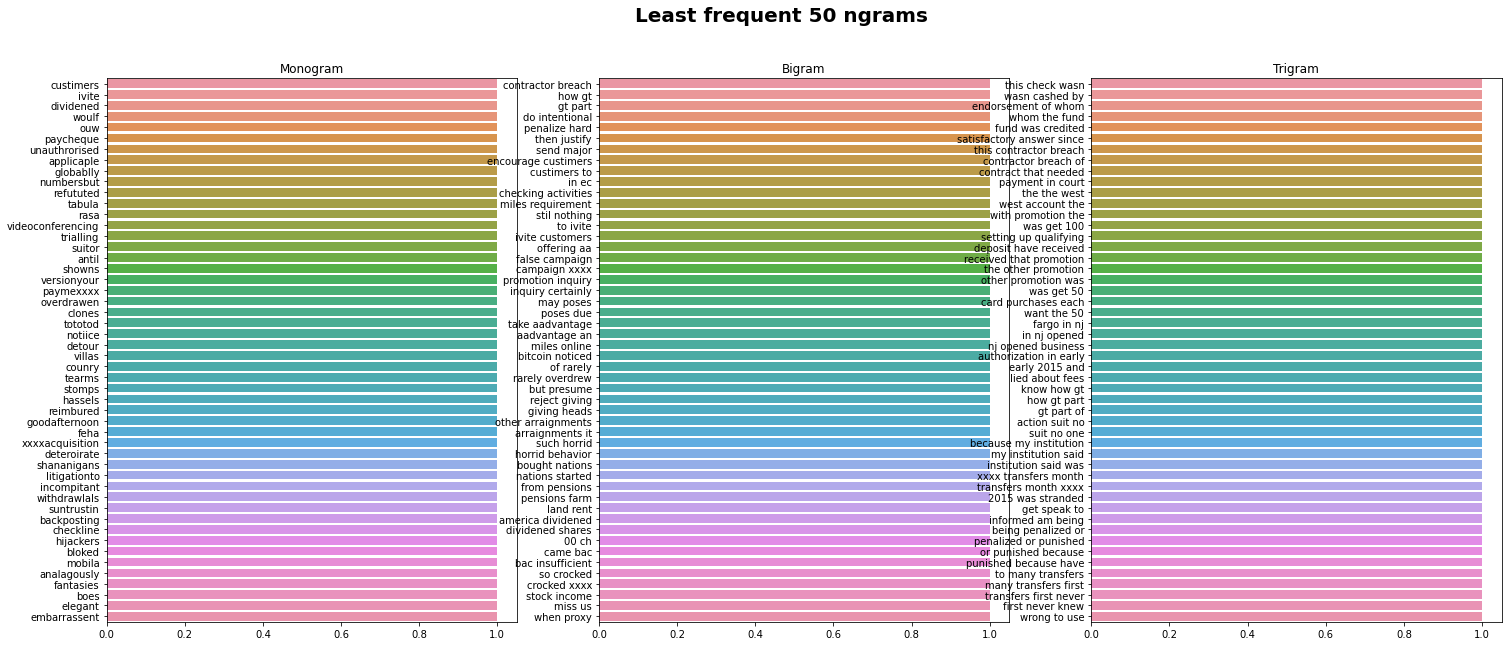

In [79]:
fig, axs = plt.subplots(1,3,figsize = (25,10))
fig.suptitle("Least frequent 50 ngrams", weight='bold', size=20)
sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');

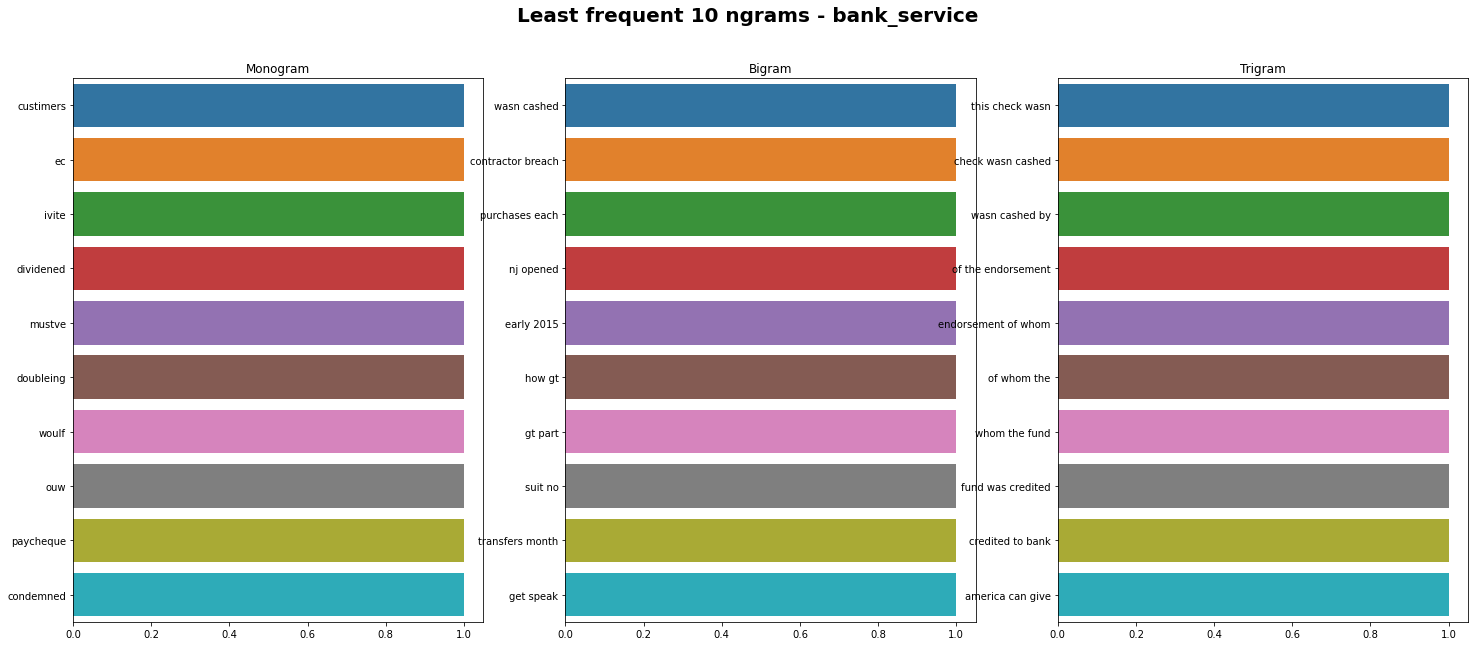

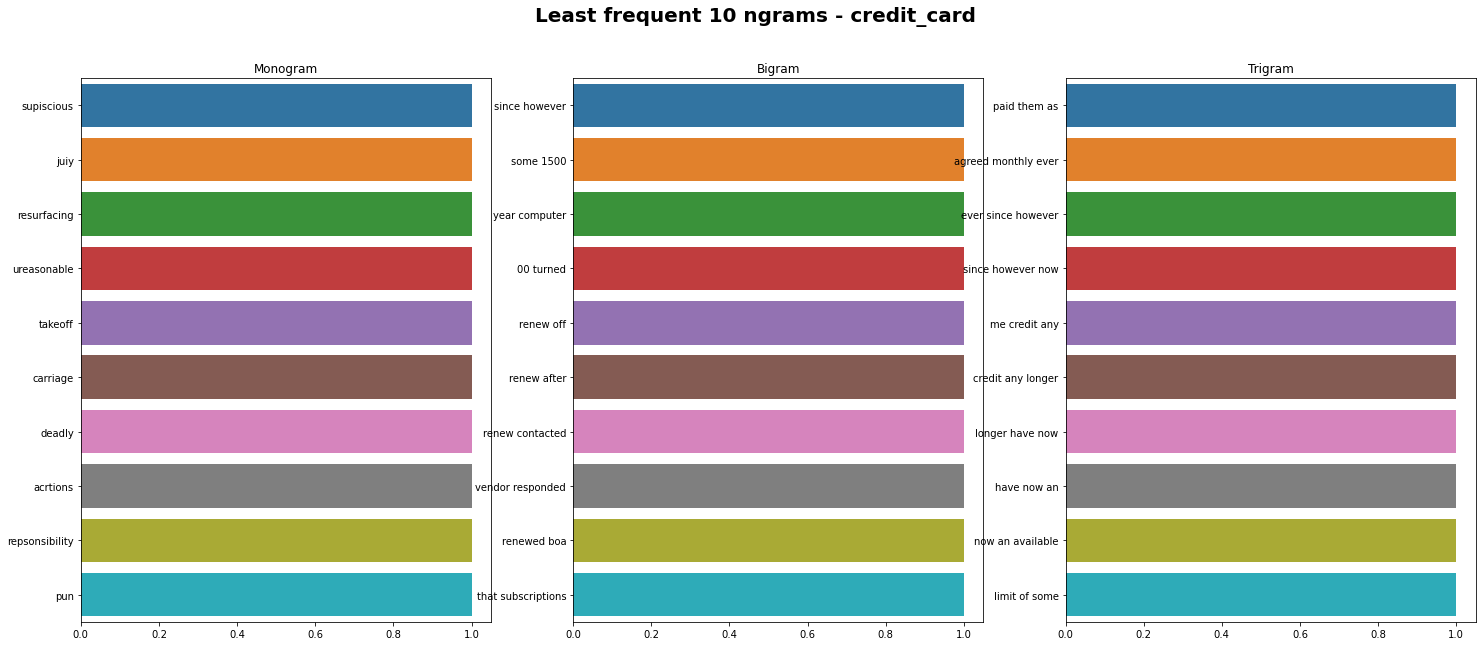

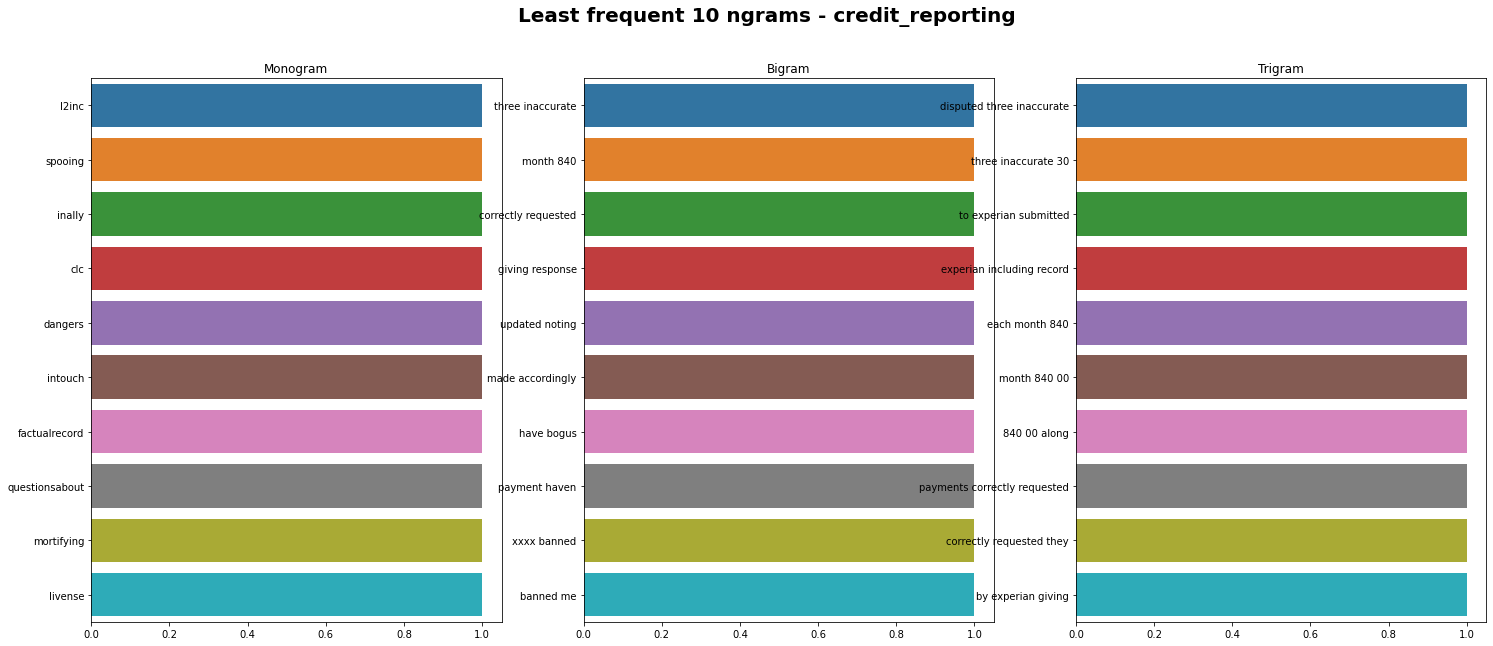

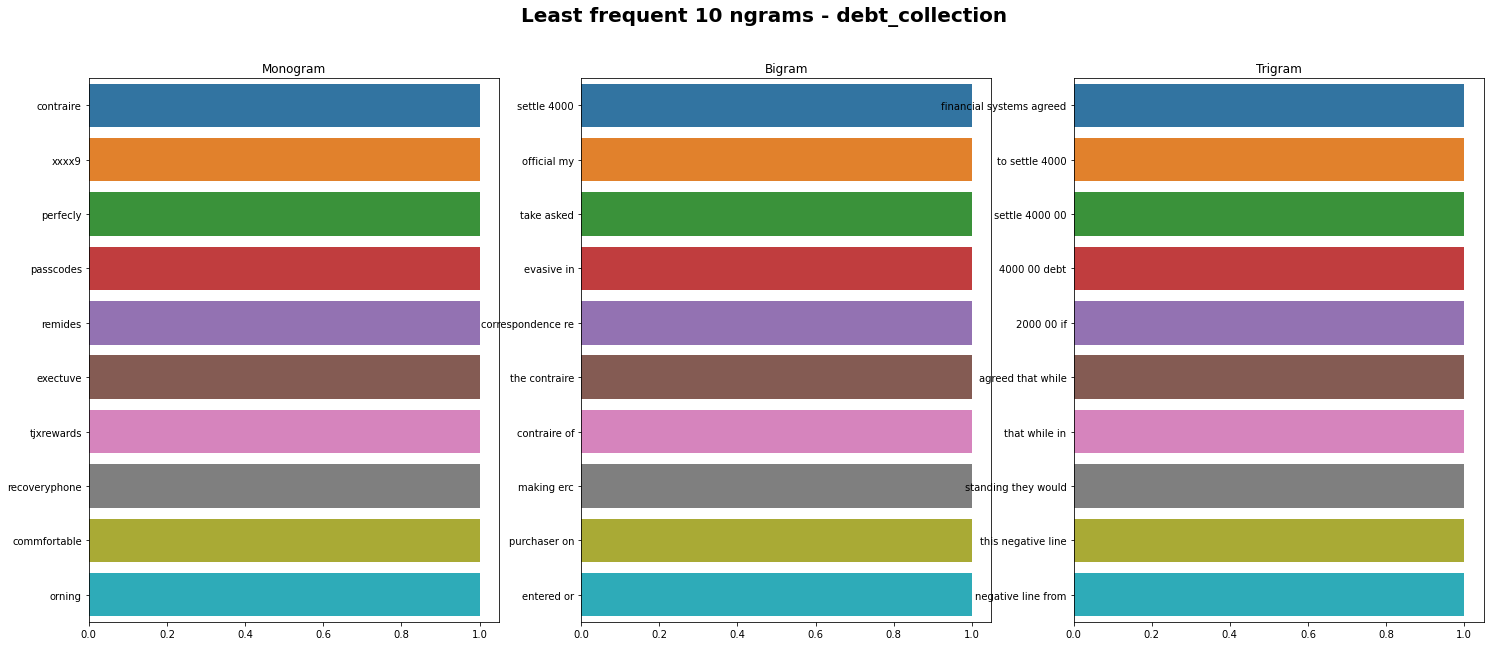

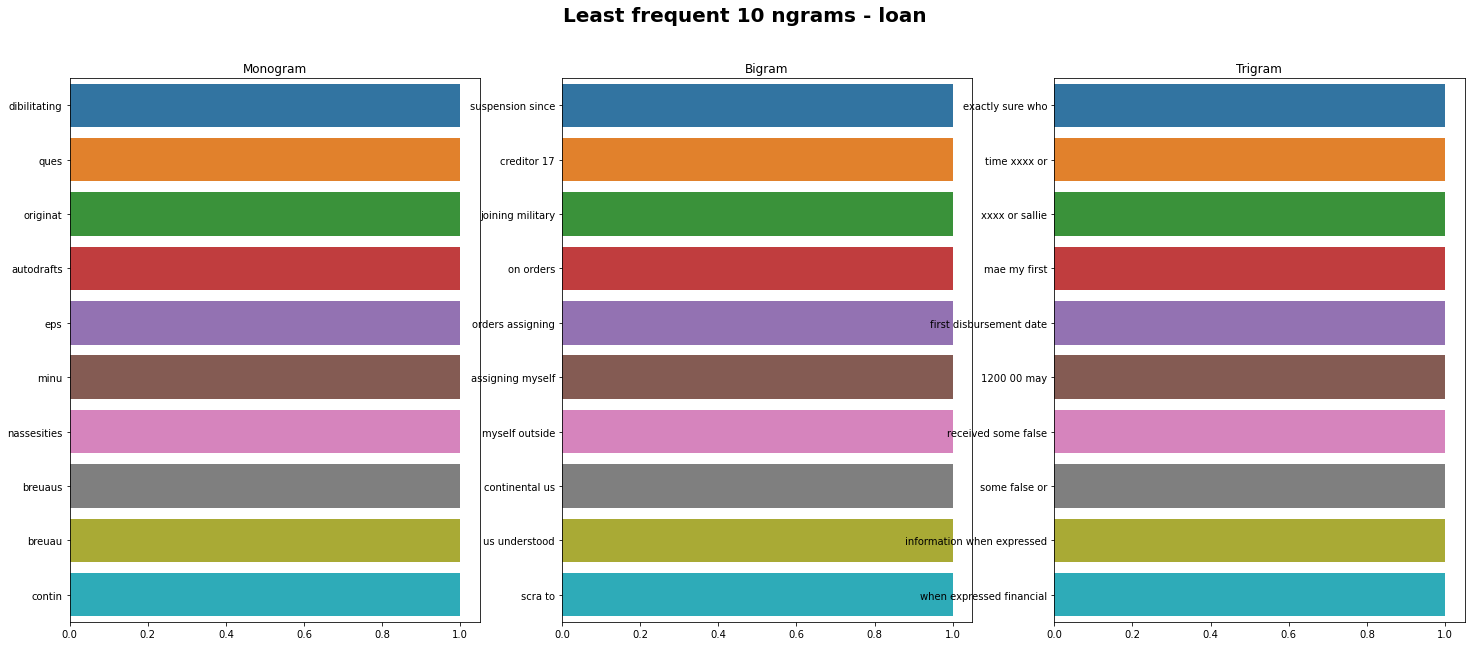

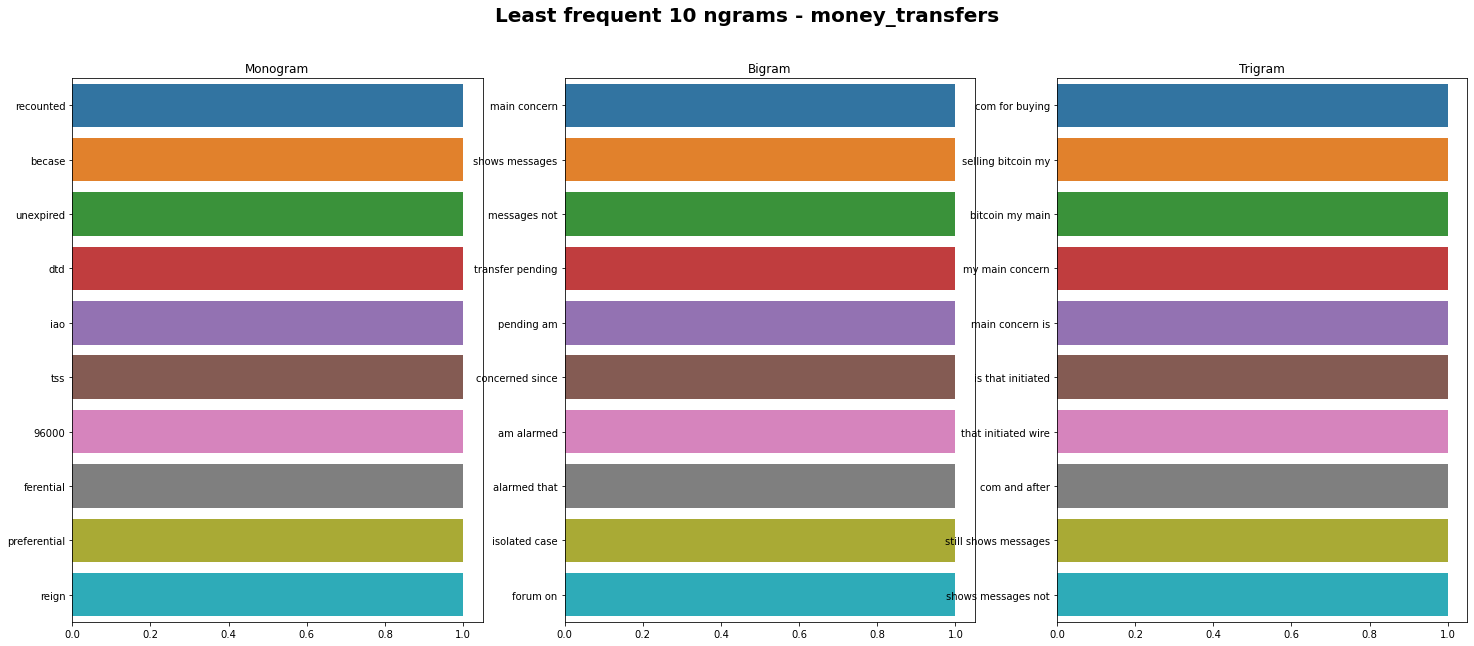

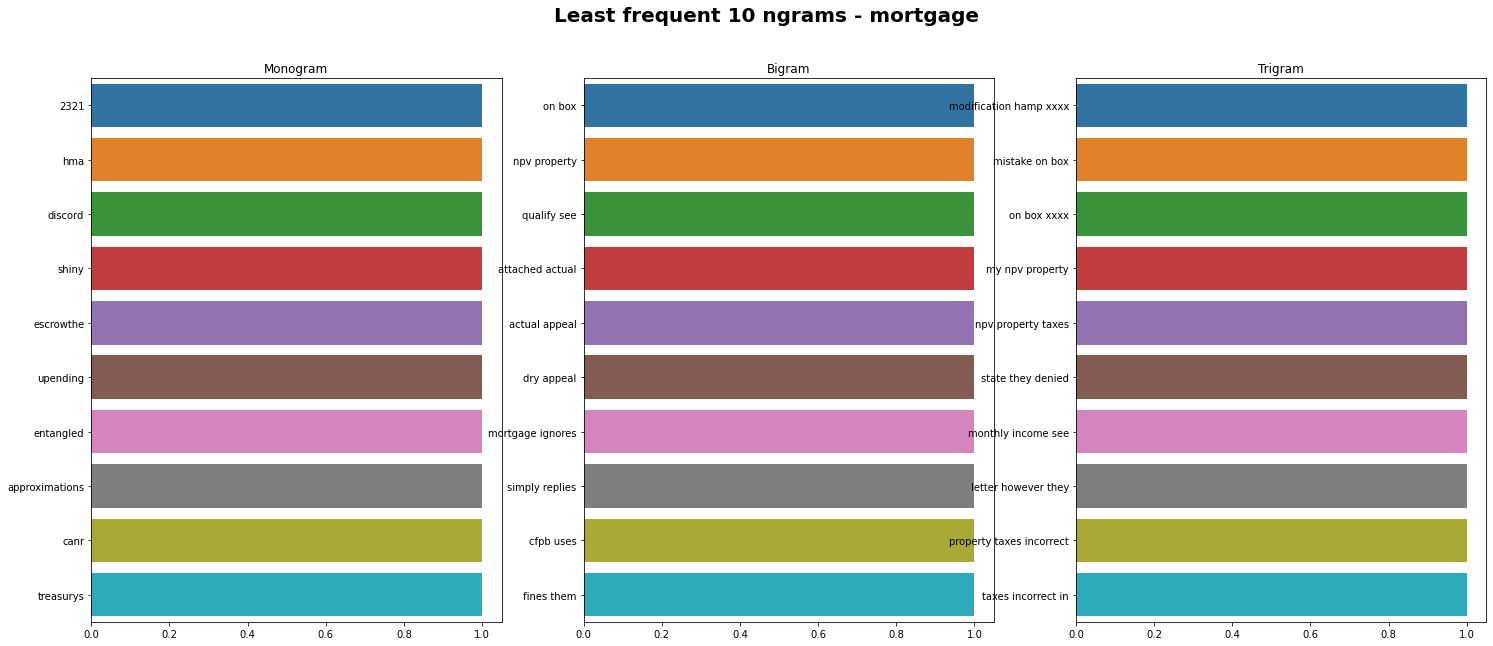

In [80]:
def least_freq_word(df, n=10, show_top_n=True):
    _, unigram = create_ngrams2(df['text'],1,n)
    _, bigram = create_ngrams2(df['text'],2,n)
    _, trigram = create_ngrams2(df['text'],3,n)
    
    if show_top_n:
        fig, axs = plt.subplots(1,3,figsize = (25,10))
        fig.suptitle("Least frequent %d ngrams - " %n + i, weight='bold', size=20)
        sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
        sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
        sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');
    
    return unigram, bigram, trigram
    
for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    _,_,_ = least_freq_word(_df)

l_freq_monogram = {}
l_freq_bigram = {}
l_freq_trigram = {}

for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    m,b,t = least_freq_word(_df, n=1000, show_top_n=False)
    m_word = list(m.keys())
    b_word = list(b.keys())
    t_word = list(t.keys())
    l_freq_monogram[i] = m_word
    l_freq_bigram[i] = b_word
    l_freq_trigram[i] = t_word

l_freq_monogram = pd.DataFrame(l_freq_monogram)
l_freq_bigram = pd.DataFrame(l_freq_bigram)
l_freq_trigram = pd.DataFrame(l_freq_trigram)

In [81]:
l_freq_monogram.head()

bank_service  credit_card credit_reporting debt_collection          loan  \
0    custimers   supiscious            l2inc       contraire  dibilitating   
1           ec         juiy          spooing           xxxx9          ques   
2        ivite  resurfacing           inally        perfecly      originat   
3    dividened  ureasonable              clc       passcodes    autodrafts   
4       mustve      takeoff          dangers         remides           eps   

  money_transfers   mortgage  
0       recounted       2321  
1          becase        hma  
2       unexpired    discord  
3             dtd      shiny  
4             iao  escrowthe

In [82]:
l_freq_bigram.head()

bank_service    credit_card     credit_reporting    debt_collection  \
0        wasn cashed  since however     three inaccurate        settle 4000   
1  contractor breach      some 1500            month 840        official my   
2     purchases each  year computer  correctly requested         take asked   
3          nj opened      00 turned      giving response         evasive in   
4         early 2015      renew off       updated noting  correspondence re   

               loan   money_transfers         mortgage  
0  suspension since      main concern           on box  
1       creditor 17    shows messages     npv property  
2  joining military      messages not      qualify see  
3         on orders  transfer pending  attached actual  
4  orders assigning        pending am    actual appeal

In [83]:
l_freq_trigram.head()

bank_service          credit_card           credit_reporting  \
0      this check wasn         paid them as  disputed three inaccurate   
1    check wasn cashed  agreed monthly ever        three inaccurate 30   
2       wasn cashed by   ever since however      to experian submitted   
3   of the endorsement    since however now  experian including record   
4  endorsement of whom        me credit any             each month 840   

            debt_collection                     loan     money_transfers  \
0  financial systems agreed         exactly sure who      com for buying   
1            to settle 4000             time xxxx or  selling bitcoin my   
2            settle 4000 00           xxxx or sallie     bitcoin my main   
3              4000 00 debt             mae my first     my main concern   
4                2000 00 if  first disbursement date     main concern is   

                 mortgage  
0  modification hamp xxxx  
1          mistake on box  
2             on box xxxx  
3         my npv property  
4      npv property taxes

# B.II. Text Cleaning

In [ ]:
"""
At this stage we will clean the text by pre-processing

We observed the punctuations, including 'Question marks' and ' Exclaimations' are not useful in EDA

Also, the stop words are appearing everywhere and overcrowding the corpus without adding any valuable information

Next, we will apply lemmatization. Although Stemming could be applied, we chose Lemmatization in this step

The following function 'pre_preprocess_text' will help us just do all these steps

"""

In [5]:
def pre_preprocess_text(text, stemming=False, lemmatizing=True, sw=None, punct_list = None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    text_token = text.split()
    ## remove Stopwords
    if sw is not None:
        text_stopwordFree = [word for word in text_token if word not in sw]
        
    # Checking all words is alphabets or not - if not remove
    text_alphabets = [i for i in text_stopwordFree if i.isalpha()]
    
    # punctuations free
    if punct_list is not None:
        text_punctFree = [w for w in text_alphabets if w not in punct_list]
                
    ## Stemming (remove -ing, -ly, ...)
    if stemming == True:
        ps = nltk.stem.porter.PorterStemmer()
        text_clean = [ps.stem(word) for word in text_punctFree]
                
    ## Lemmatisation (convert the word into root word)
    if lemmatizing == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text_clean = [lem.lemmatize(word) for word in text_punctFree]
            
    ## back to string from list
    text = " ".join(text_clean)
    
    return text

In [6]:
stopwords_list = nltk.corpus.stopwords.words("english")
puncts = [i for i in string.punctuation]

df_text['clean_text'] = df_text['text'].apply(lambda x: pre_preprocess_text(x, sw=stopwords_list, 
                                                                            punct_list = puncts))

In [8]:
df_text[['text','clean_text']].head()

text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                On XX/XX/2017 my check # XXXX was debited from my checking account, and this check wasn't cashed by XXXX XXXX XXXX, I requested a copy of the endorsement of whom the fund was credited to, Bank of America can't give me satisfactory answer, since this contractor breach of contract that I needed proof of payment in court.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [42]:
re.sub(r'[^\w\s]', '', str(df_text['text'][0]).lower().strip())

'on xxxx2017 my check  xxxx was debited from my checking account and this check wasnt cashed by xxxx xxxx xxxx i requested a copy of the endorsement of whom the fund was credited to bank of america cant give me satisfactory answer since this contractor breach of contract that i needed proof of payment in court'

In [38]:
df_text['text'][0]

"On XX/XX/2017 my check # XXXX was debited from my checking account, and this check wasn't cashed by XXXX XXXX XXXX, I requested a copy of the endorsement of whom the fund was credited to, Bank of America can't give me satisfactory answer, since this contractor breach of contract that I needed proof of payment in court."

# B. II. After Text Cleaning

In [ ]:
"""
After text processing, we want to revisit most frequent words in corpus and in each product groups
"""

In [26]:
_, unigram = create_ngrams(df_text['clean_text'],1,50)
_, bigram = create_ngrams(df_text['clean_text'],2,50)
_, trigram = create_ngrams(df_text['clean_text'],3,50)

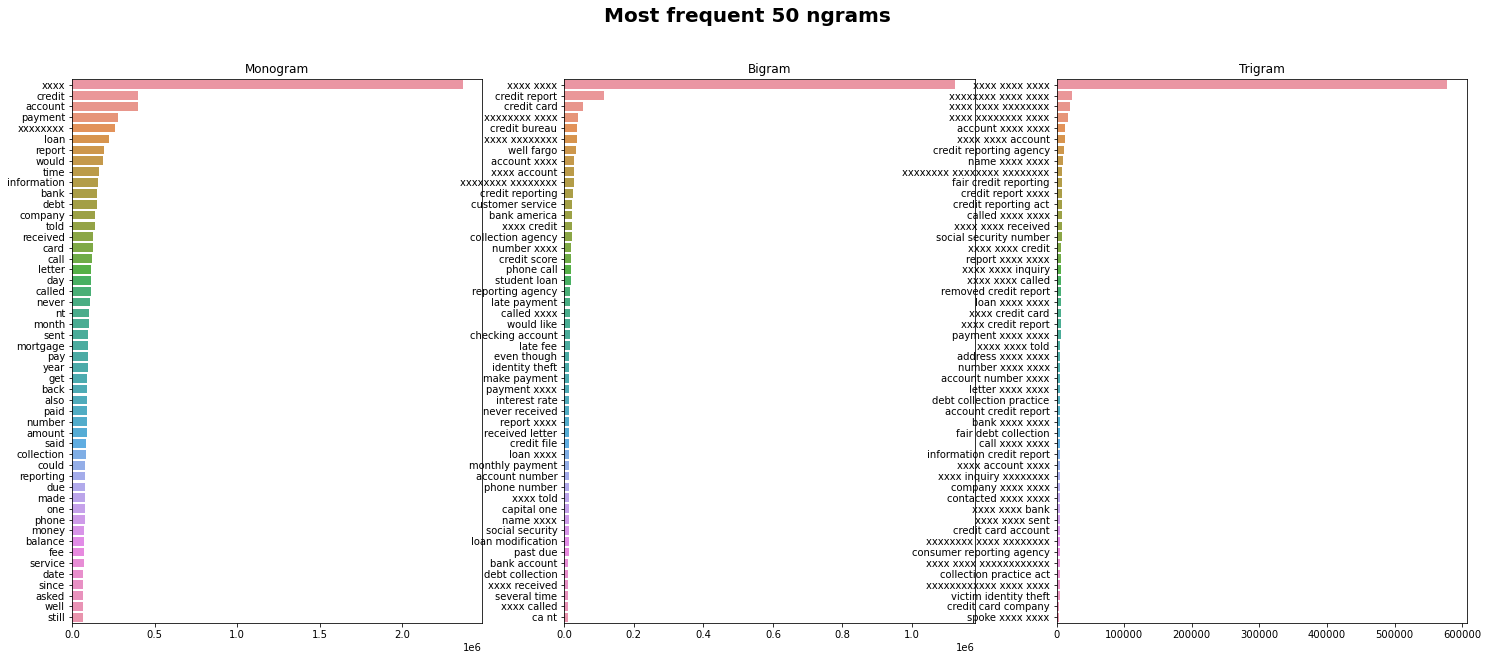

In [27]:
fig, axs = plt.subplots(1,3,figsize = (25,10))
fig.suptitle("Most frequent 50 ngrams", weight='bold', size=20)
sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');

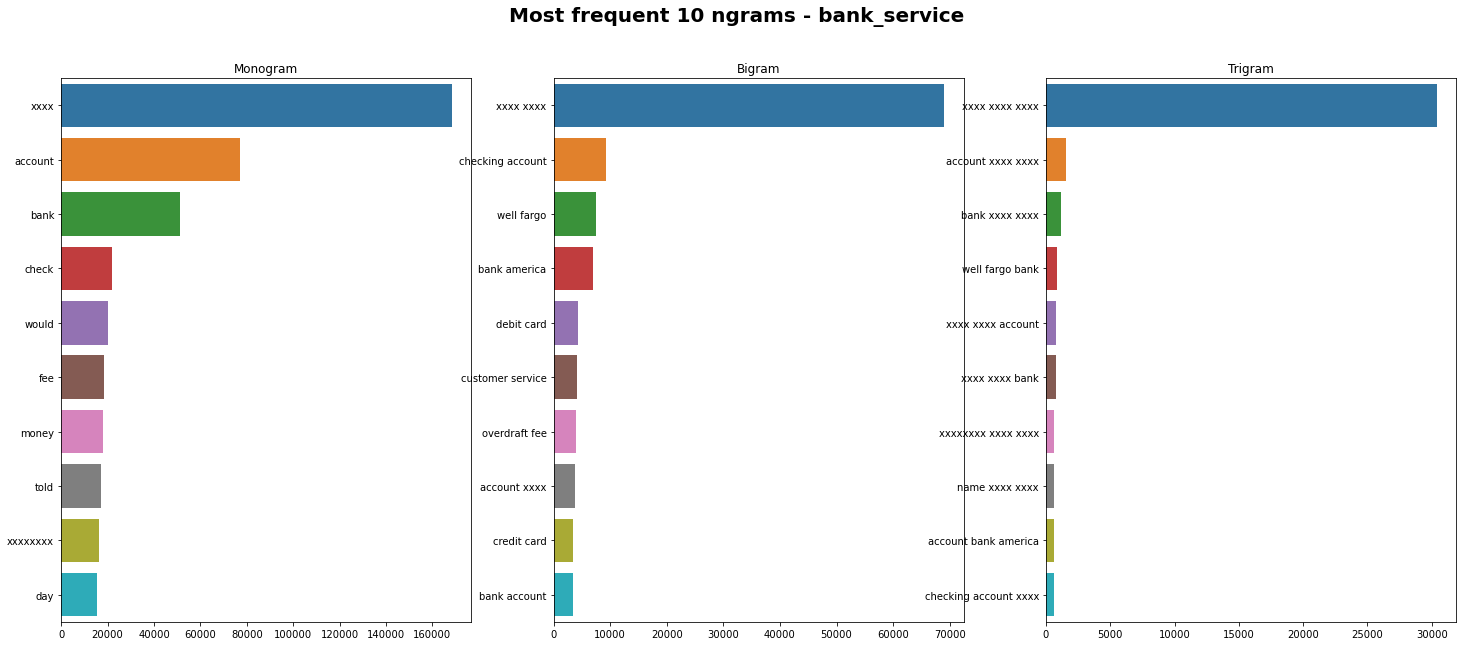

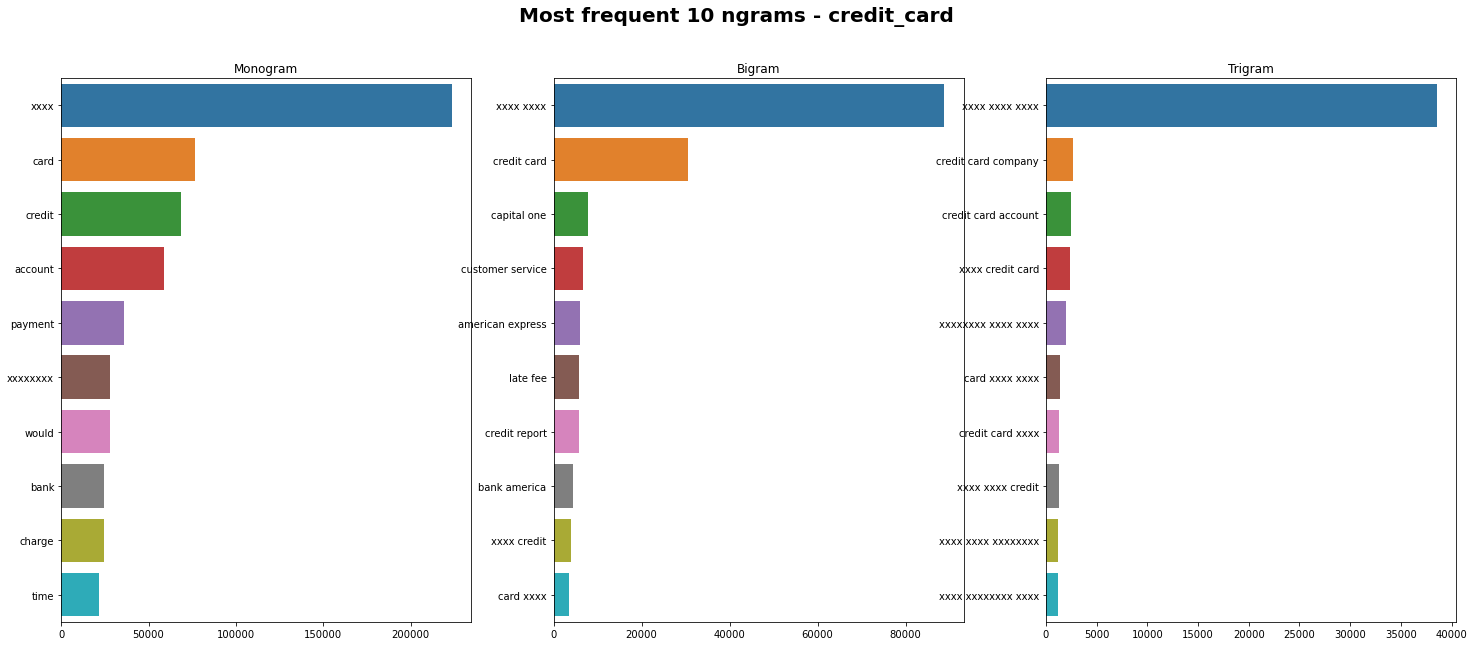

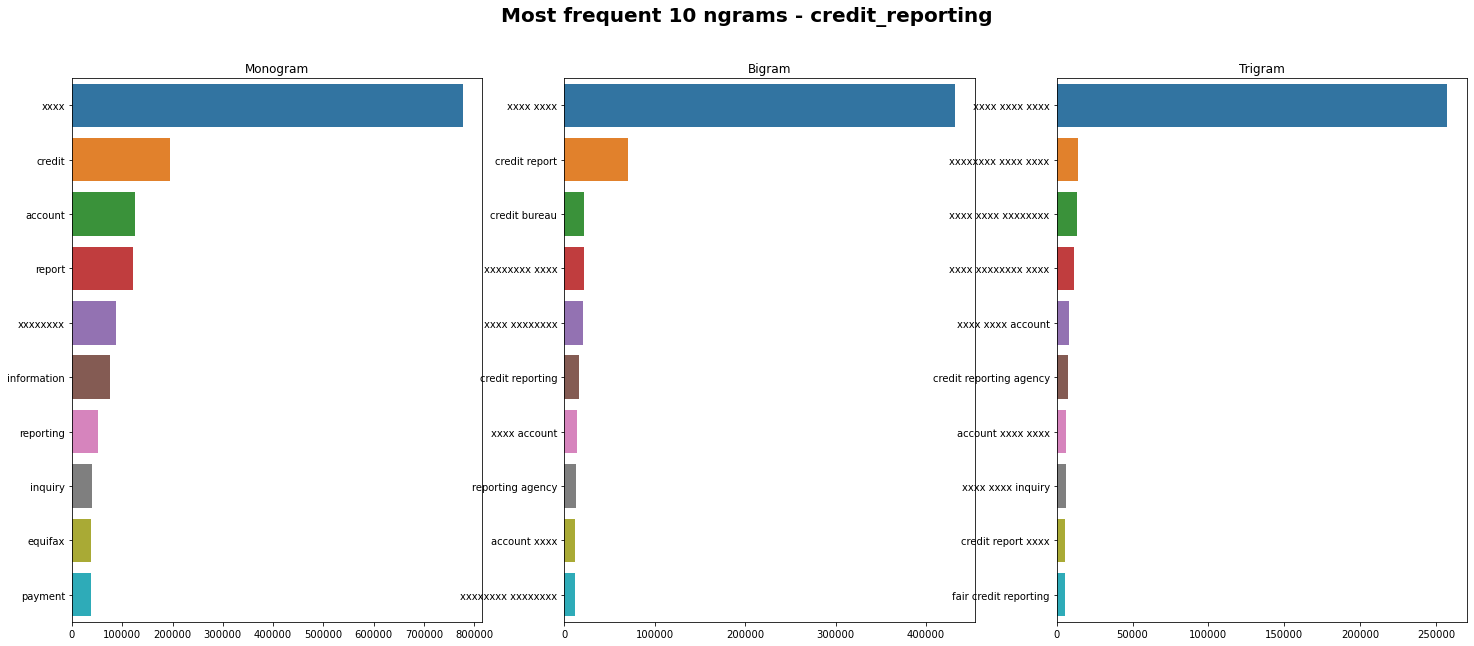

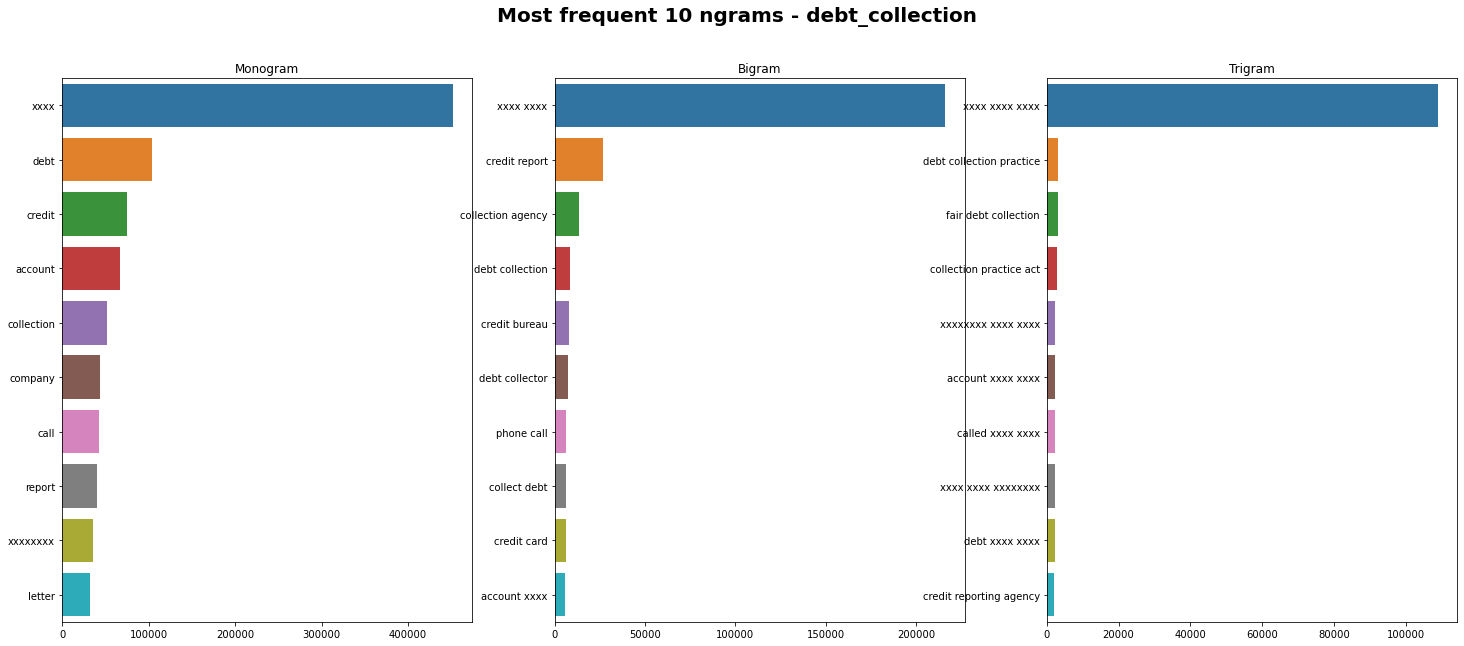

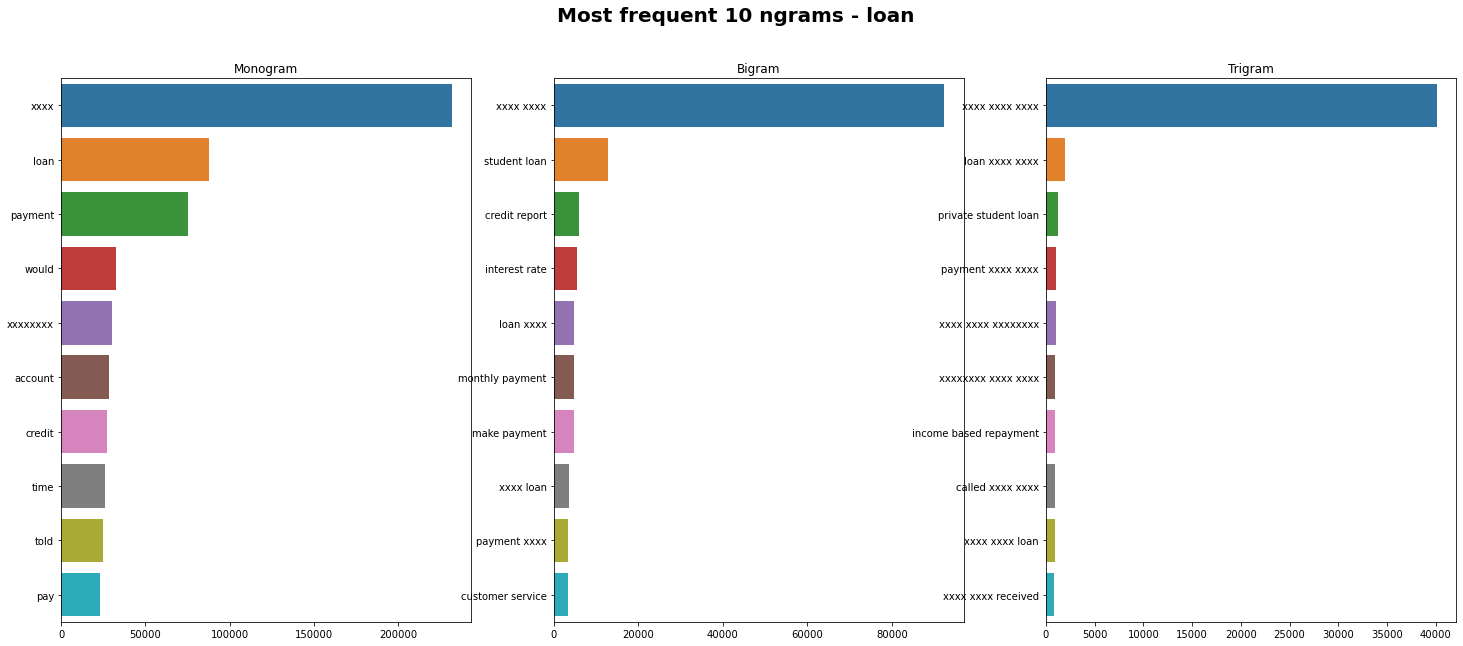

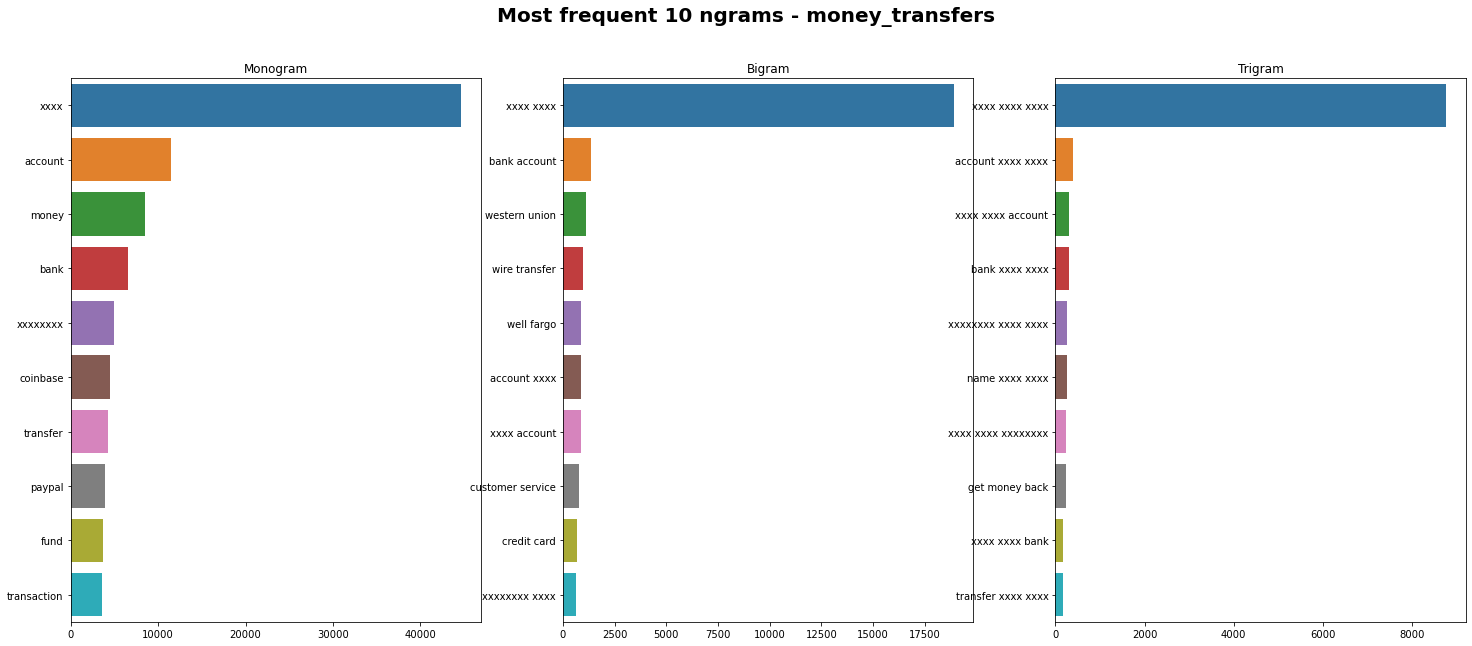

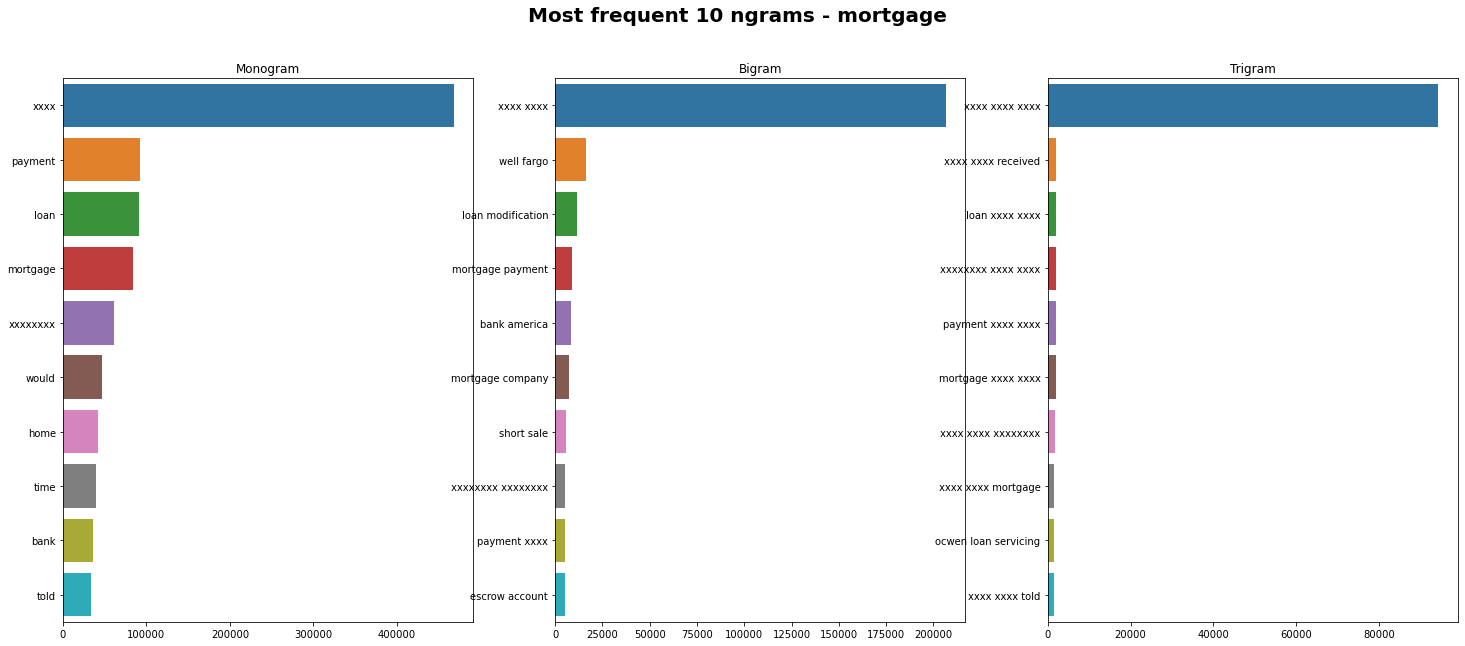

In [22]:
def most_freq_word(df, n=10, show_top_n=True):
    _, unigram = create_ngrams(df['clean_text'],1,n)
    _, bigram = create_ngrams(df['clean_text'],2,n)
    _, trigram = create_ngrams(df['clean_text'],3,n)
    
    if show_top_n:
        fig, axs = plt.subplots(1,3,figsize = (25,10))
        fig.suptitle("Most frequent %d ngrams - " %n + i, weight='bold', size=20)
        sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
        sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
        sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');
    
    return unigram, bigram, trigram
    
for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    _,_,_ = most_freq_word(_df)

most_freq_monogram = {}
most_freq_bigram = {}
most_freq_trigram = {}

for i in df_text.product_group.unique():
    _df = df_text.loc[df_text.product_group == i]
    m,b,t = most_freq_word(_df, n=1000, show_top_n=False)
    m_word = list(m.keys())
    b_word = list(b.keys())
    t_word = list(t.keys())
    most_freq_monogram[i] = m_word
    most_freq_bigram[i] = b_word
    most_freq_trigram[i] = t_word

most_freq_monogram = pd.DataFrame(most_freq_monogram)
most_freq_bigram = pd.DataFrame(most_freq_bigram)
most_freq_trigram = pd.DataFrame(most_freq_trigram)

In [53]:
most_freq_monogram.head()

bank_service credit_card credit_reporting debt_collection      loan  \
0         xxxx        xxxx             xxxx            xxxx      xxxx   
1      account        card           credit            debt      loan   
2         bank      credit          account          credit   payment   
3        check     account           report         account     would   
4        would     payment         xxxxxxxx      collection  xxxxxxxx   

  money_transfers  mortgage  
0            xxxx      xxxx  
1         account   payment  
2           money      loan  
3            bank  mortgage  
4        xxxxxxxx  xxxxxxxx

In [54]:
most_freq_bigram.head()

bank_service       credit_card credit_reporting    debt_collection  \
0         xxxx xxxx         xxxx xxxx        xxxx xxxx          xxxx xxxx   
1  checking account       credit card    credit report      credit report   
2        well fargo       capital one    credit bureau  collection agency   
3      bank america  customer service    xxxxxxxx xxxx    debt collection   
4        debit card  american express    xxxx xxxxxxxx      credit bureau   

            loan money_transfers           mortgage  
0      xxxx xxxx       xxxx xxxx          xxxx xxxx  
1   student loan    bank account         well fargo  
2  credit report   western union  loan modification  
3  interest rate   wire transfer   mortgage payment  
4      loan xxxx      well fargo       bank america

In [56]:
most_freq_trigram.head()

bank_service          credit_card    credit_reporting  \
0     xxxx xxxx xxxx       xxxx xxxx xxxx      xxxx xxxx xxxx   
1  account xxxx xxxx  credit card company  xxxxxxxx xxxx xxxx   
2     bank xxxx xxxx  credit card account  xxxx xxxx xxxxxxxx   
3    well fargo bank     xxxx credit card  xxxx xxxxxxxx xxxx   
4  xxxx xxxx account   xxxxxxxx xxxx xxxx   xxxx xxxx account   

            debt_collection                  loan     money_transfers  \
0            xxxx xxxx xxxx        xxxx xxxx xxxx      xxxx xxxx xxxx   
1  debt collection practice        loan xxxx xxxx   account xxxx xxxx   
2      fair debt collection  private student loan   xxxx xxxx account   
3   collection practice act     payment xxxx xxxx      bank xxxx xxxx   
4        xxxxxxxx xxxx xxxx    xxxx xxxx xxxxxxxx  xxxxxxxx xxxx xxxx   

             mortgage  
0      xxxx xxxx xxxx  
1  xxxx xxxx received  
2      loan xxxx xxxx  
3  xxxxxxxx xxxx xxxx  
4   payment xxxx xxxx

In [57]:
for i,j in zip(['masked_XX', 'masked_to_words'],
               [ 15,0.15]):
    explore_features(i, j)

masked_XX : 18.79 Percentage of records are with more than 15 masked_XX in train data and the count is 50432
masked_to_words : 5.71 Percentage of records are with more than 0.15 masked_to_words in train data and the count is 15314


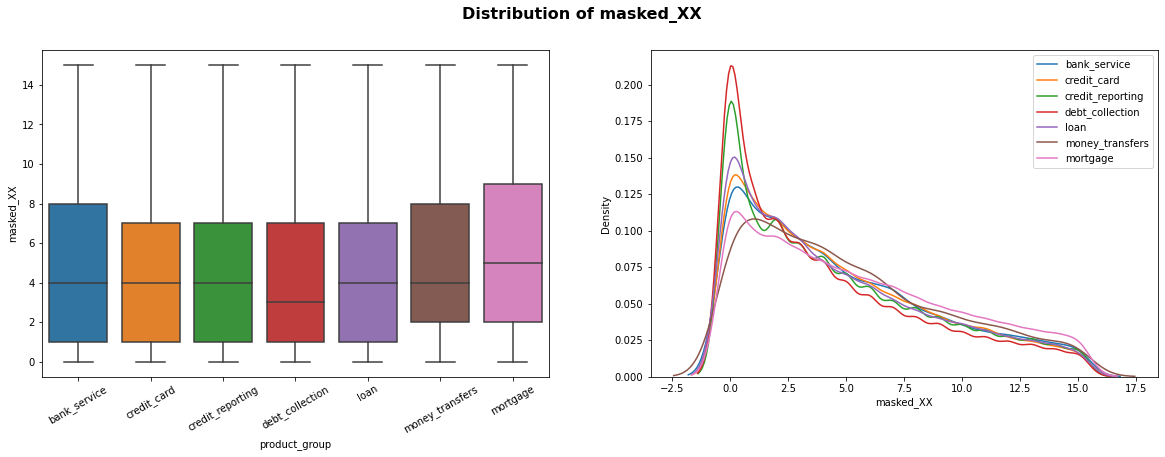

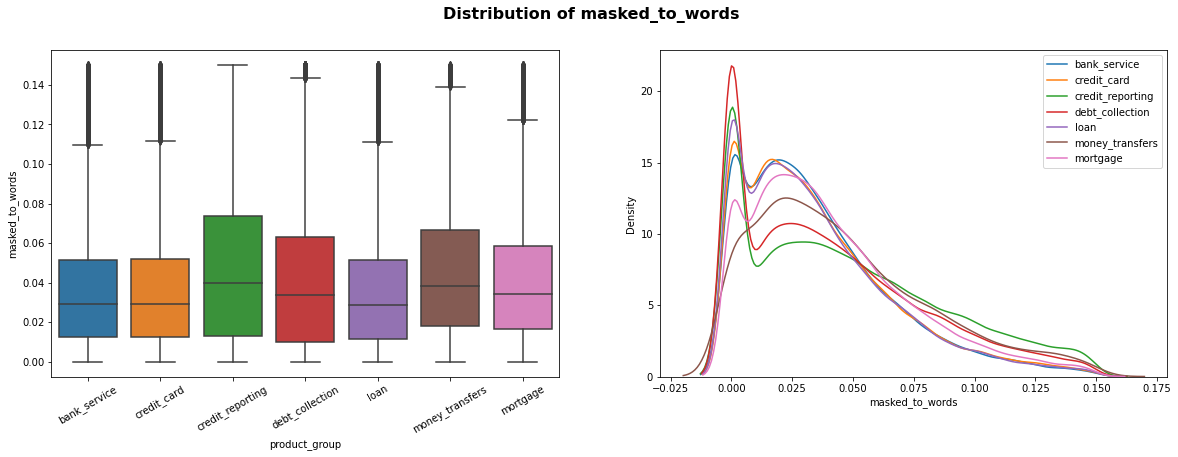

In [58]:
for (i,j) in zip(['masked_XX','masked_to_words'],[15,0.15]):
    visualize_features(i, j)

In [ ]:
text = df_text['clean_text'].apply(lambda x: np.str_(x))
cv = CountVectorizer().fit(text)
bag_of_words = cv.transform(text)

In [ ]:
indx = np.random.randint(0,1000,100)
len(indx)

In [ ]:
bow = bag_of_words.toarray()
bow = bow[:,indx]
print('done!')

In [ ]:
xticklabels = cv.get_feature_names()[indx]
sns.heatmap(bow, annot=True, cbar = False, xticklabels=xticklabels)

In [ ]:
"""
1. We can clearly see masking is overcrwoding the text data - but also saw there is variations in number 
    of masked words across different groups - Therefore, decided to keep them 

2. We used Bag of Words (BoW) to get most and least frequent words

3. Now, finally we will build TF-IDF - which will be used in the model development

"""

In [7]:
def create_ngrams2(text, ngram, top_n_words):
    text = text.apply(lambda x: np.str_(x))
    cv = CountVectorizer(ngram_range=(ngram, ngram)).fit(text)
    bag_of_words = cv.transform(text)
    sum_of_words = bag_of_words.sum(axis=0) 
    words_freq = [(w, sum_of_words[0, i]) for w, i in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1])
    
    return words_freq[:top_n_words], dict(words_freq[:top_n_words])

In [8]:
_, unigram = create_ngrams2(df_text['text'],1,50)
_, bigram = create_ngrams2(df_text['text'],2,50)
_, trigram = create_ngrams2(df_text['text'],3,50)

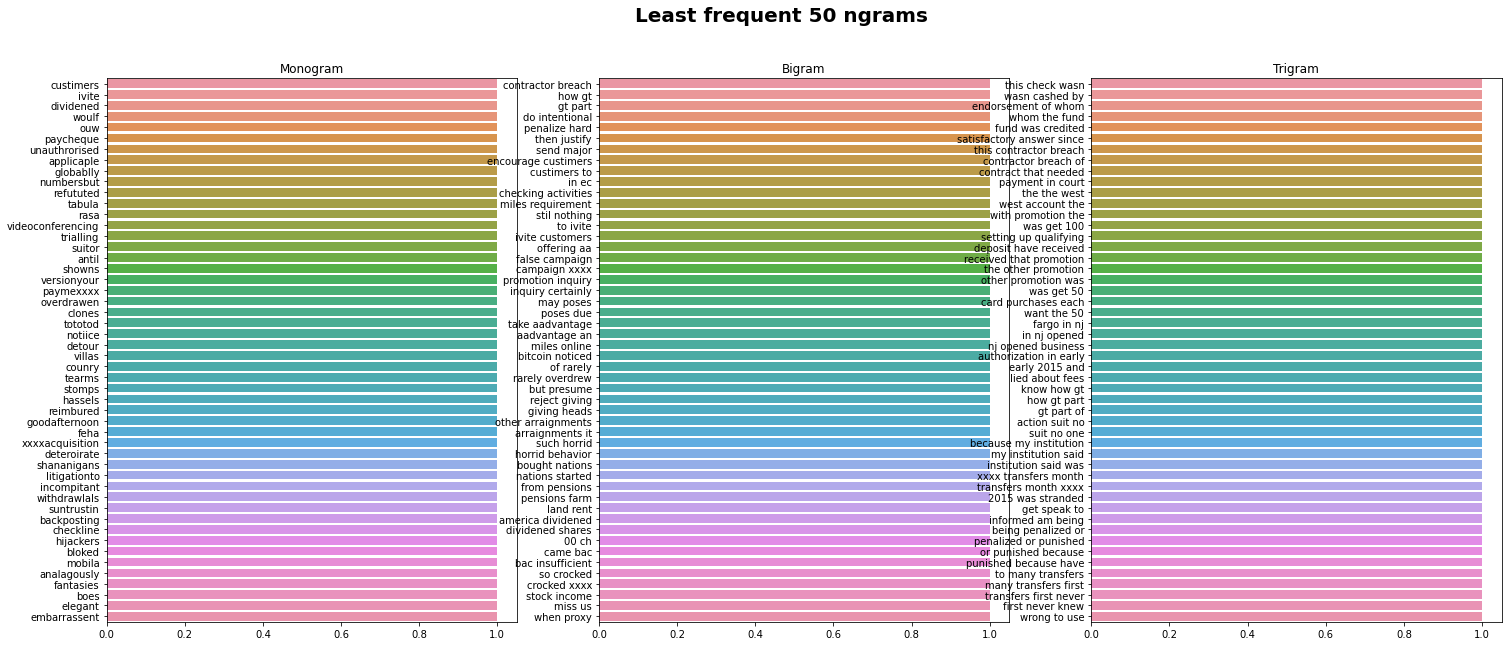

In [9]:
fig, axs = plt.subplots(1,3,figsize = (25,10))
fig.suptitle("Least frequent 50 ngrams", weight='bold', size=20)
sns.barplot(x=list(unigram.values()),y=list(unigram.keys()),ax=axs[0]); axs[0].set_title('Monogram')
sns.barplot(x=list(bigram.values()),y=list(bigram.keys()),ax=axs[1]); axs[1].set_title('Bigram')
sns.barplot(x=list(trigram.values()),y=list(trigram.keys()),ax=axs[2]); axs[2].set_title('Trigram');

In [ ]:
# PCA - using TF-IDF

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfv = TfidfVectorizer(min_df=3, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

text_pca = df_text['clean_text']
tfv.fit(text_pca)
text_pca_tfv =  tfv.transform(text_pca)

X = text_pca_tfv.todense()

reduced_data = PCA(n_components=2).fit_transform(X)

my_palette = {"bank_service": "tab:blue", "credit_card": "tab:orange", "credit_reporting":"tab:green",
                  "debt_collection":"tab:red", "loan":"tab:purple" ,"money_transfers":"tab:brown" ,
                  "mortgage":"tab:pink"
                 }

clss = df_text['product_group'].values.reshape(len(df_text),1)
X_pca = pd.DataFrame(np.hstack((reduced_data,clss)), columns = ['PCA1', 'PCA2','class'])

# this was with 1000 features
X_pca['color'] = X_pca['class'].map(my_palette)

plt.figure(figsize = (12,6))
sns.scatterplot(data=X_pca, x='PCA1', y='PCA2', hue='class');

In [11]:
X_pca.head()

PCA1      PCA2         class     color
0 -0.058879 -0.052114  bank_service  tab:blue
1 -0.084443 -0.109562  bank_service  tab:blue
2 -0.049013 -0.051678  bank_service  tab:blue
3   -0.1633 -0.104556  bank_service  tab:blue
4 -0.082661 -0.064461  bank_service  tab:blue

In [ ]:
my_palette2 = {"bank_service": "tab:blue", "credit_card": "tab:orange", "credit_reporting":"tab:green",
              "debt_collection":"tab:red", "loan":"tab:purple" ,"money_transfers":"tab:brown" ,
              "mortgage":"tab:pink",
              "other":'black'
                 }
f,axs = plt.subplots(7,1, figsize=(6,28))
j=0
for i in X_pca['class'].unique():
    _df = X_pca.copy()
    _df['class_new'] = np.where(X_pca['class']==i, i, "all other")
    print(j)
    sns.scatterplot(data=_df, x='PCA1', y='PCA2', hue='class_new', ax = axs[j])
    j += 1

In [ ]:
"""
The PCA analysis shows the 2 dimensional projection of high dimension TF-IFD vectors

The PCA results suggests that it will be easier to idenfy few product groups, whereas in some
product groups, finding the correct classes may be difficult

Overall the plot is promosing and we can expect to generate satisfying results
"""

In [7]:
def run_TFIDF(corpus, custom_stopwords=True, vocabs = None):
    
        
    if custom_stopwords:
        sw = set(to_remove)
    else:
        sw = 'english'
        
    if vocabs == None:
        print ("Creating TF-IDF based on MonoGram and BiGram only due to computation limitations...")
        print ("Limiting maximum features to 10k in TF-IDF only due to computation limitations...")
        
        tfv = TfidfVectorizer(min_df=3,  max_features=10000, 
                              strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                              ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
                              stop_words = sw)
        
    else:
        print ("Creating TF-IDF based on MonoGram and BiGram only due to computation limitations...")
        print ("Limiting maximum features to %d in TF-IDF only due to computation limitations..." %len(vocabs))
        v_list = vocabs
        tfv = TfidfVectorizer(min_df=3,  max_features=10000, 
                              strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                              ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
                              stop_words = sw, vocabulary = v_list)
        
    

    print("fitting TF-IDF ...")
    tfv.fit(corpus)
    
    print("transforming TF-IDF ...")
    text_tfv =  tfv.transform(corpus)
    dic_tfv = tfv.vocabulary_
    
    return dic_tfv, tfv, text_tfv


def get_most_predictive_features(df, top_n, custom_sw=True, show_top_5=True):
    
    corpus = df['clean_text']
    dic_tfv, tfv, text_tfv = run_TFIDF(corpus, custom_sw)
    
    print('Converting from Sparse to Dense...')
    features = text_tfv.toarray()
    print('Convertion to Dense complete...')
    
    top_n_features = []
    
    for product in df_text.product_group.unique():
        features_chi2 = chi2(features, df_text["product_group"] == product)
        indices = np.argsort(features_chi2[0])
        feature_names = np.array(tfv.get_feature_names())[indices]
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
        top_n_features.append(unigrams[-top_n:])
        
        if show_top_5:
            print("n==> %s:" %(product))
            print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-5:])))
            print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-5:])))
            
    return dic_tfv, tfv, text_tfv, top_n_features

In [ ]:
"""
Implemented Chi-Square test to identify most predictive co-efficients to classify the text data

We also printed out top 5 most useful 'unigrams' and 'bigrams' for each product groups

Finally, these also helped us reducing the number of most important features from 7000 to 2541

For next steps, these 2541 most informative unigrams will be used for model building
"""

In [8]:
dic_tfv, tfv, text_tfv, top_n_each = get_most_predictive_features(df_text, 1000, custom_sw=False)
                             
top_n_each_flat = [w for sublist in top_n_each for w in sublist]
top_n_uniques = list(set(top_n_each_flat))
print(len(top_n_each_flat), "==>",len(top_n_uniques))

Creating TF-IDF based on MonoGram and BiGram only due to computation limitations...
Limiting maximum features to 10k in TF-IDF only due to computation limitations...
fitting TF-IDF ...
transforming TF-IDF ...
Converting from Sparse to Dense...
Convertion to Dense complete...
n==> bank_service:
  * Most Correlated Unigrams are: branch, checking, bank, deposit, overdraft
  * Most Correlated Bigrams are: direct deposit, debit card, saving account, overdraft fee, checking account
n==> credit_card:
  * Most Correlated Unigrams are: amex, citi, express, reward, card
  * Most Correlated Bigrams are: card company, balance transfer, annual fee, american express, credit card
n==> credit_reporting:
  * Most Correlated Unigrams are: transunion, report, experian, inquiry, equifax
  * Most Correlated Bigrams are: xxxx equifax, equifax xxxx, credit file, hard inquiry, credit report
n==> debt_collection:
  * Most Correlated Unigrams are: collector, recovery, collect, collection, debt
  * Most Correlat

In [27]:
tfidf_df = pd.DataFrame(text_tfv.toarray(),columns=tfv.get_feature_names())

In [29]:
tfidf_df.head()

aadvantage  abandoned  abide  ability  ability obtain  ability pay  able  \
0        0.00       0.00   0.00     0.00            0.00         0.00  0.00   
1        0.00       0.00   0.00     0.00            0.00         0.00  0.00   
2        0.00       0.00   0.00     0.00            0.00         0.00  0.00   
3        0.00       0.00   0.00     0.00            0.00         0.00  0.06   
4        0.17       0.00   0.00     0.00            0.00         0.00  0.00   

   able access  able afford  able contact  able help  able make  able obtain  \
0         0.00         0.00          0.00       0.00       0.00         0.00   
1         0.00         0.00          0.00       0.00       0.00         0.00   
2         0.00         0.00          0.00       0.00       0.00         0.00   
3         0.00         0.00          0.00       0.00       0.00         0.00   
4         0.00         0.00          0.00       0.00       0.00         0.00   

   able pay  able provide  able reach  able speak  able use  able verify  \
0      0.00          0.00        0.00        0.00      0.00         0.00   
1      0.00          0.00        0.00        0.00      0.00         0.00   
2      0.00          0.00        0.00        0.00      0.00         0.00   
3      0.00          0.00        0.00        0.12      0.00         0.00   
4      0.00          0.00        0.00        0.00      0.00         0.00   

   able work  absence  absolute  absolutely  absurd  abuse  abused  abusive  \
0       0.00     0.00      0.00        0.00    0.00   0.00    0.00     0.00   
1       0.00     0.00      0.00        0.00    0.00   0.00    0.00     0.00   
2       0.00     0.00      0.00        0.00    0.00   0.00    0.00     0.00   
3       0.00     0.00      0.00        0.00    0.00   0.00    0.00     0.00   
4       0.00     0.00      0.00        0.00    0.00   0.00    0.00     0.00   

    ac  acc  acc xxxx  accept  accept payment  acceptable  acceptance  \
0 0.00 0.00      0.00    0.00            0.00        0.00        0.00   
1 0.00 0.00      0.00    0.00            0.00        0.00        0.00   
2 0.00 0.00      0.00    0.00            0.00        0.00        0.00   
3 0.00 0.00      0.00    0.00            0.00        0.00        0.00   
4 0.00 0.00      0.00    0.00            0.00        0.00        0.00   

   accepted  accepted payment  accepting  access  access account  \
0      0.00              0.00       0.00    0.00            0.00   
1      0.00              0.00       0.00    0.00            0.00   
2      0.00              0.00       0.00    0.00            0.00   
3      0.00              0.00       0.00    0.00            0.00   
4      0.00              0.00       0.00    0.00            0.00   

   access credit  access fund  access information  access money  \
0           0.00         0.00                0.00          0.00   
1           0.00         0.00                0.00          0.00   
2           0.00         0.00                0.00          0.00   
3           0.00         0.00                0.00          0.00   
4           0.00         0.00                0.00          0.00   

   access online  access xxxx  accessed  accessing  accident  accidentally  \
0           0.00         0.00      0.00       0.00      0.00          0.00   
1           0.00         0.00      0.00       0.00      0.00          0.00   
2           0.00         0.00      0.00       0.00      0.00          0.00   
3           0.00         0.00      0.00       0.00      0.00          0.00   
4           0.00         0.00      0.00       0.00      0.00          0.00   

   accordance  accordance fair  accordance fcra  according  according credit  \
0        0.00             0.00             0.00       0.00              0.00   
1        0.00             0.00             0.00       0.00              0.00   
2        0.00             0.00             0.00       0.00              0.00   
3        0.00             0.00             0.00       0.00              0.0

In [30]:
tfidf_df.shape

(268343, 10000)

In [35]:
# sample 100 words and see correlation heatmap
indx = np.random.randint(0,10000,10)

tfidf_df_sample = tfidf_df.iloc[:,indx]
tfidf_df_sample.head()

right  check sent  total xxxx  cra  term month  serviced  xxxx extension  \
0   0.00        0.00        0.00 0.00        0.00      0.00            0.00   
1   0.00        0.00        0.00 0.00        0.00      0.00            0.00   
2   0.00        0.00        0.00 0.00        0.00      0.00            0.00   
3   0.00        0.00        0.00 0.00        0.00      0.00            0.00   
4   0.00        0.00        0.00 0.00        0.00      0.00            0.00   

   gain access  attempted collect  xxxx district  
0         0.00               0.00           0.00  
1         0.00               0.00           0.00  
2         0.00               0.00           0.00  
3         0.00               0.00           0.00  
4         0.00               0.00           0.00

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


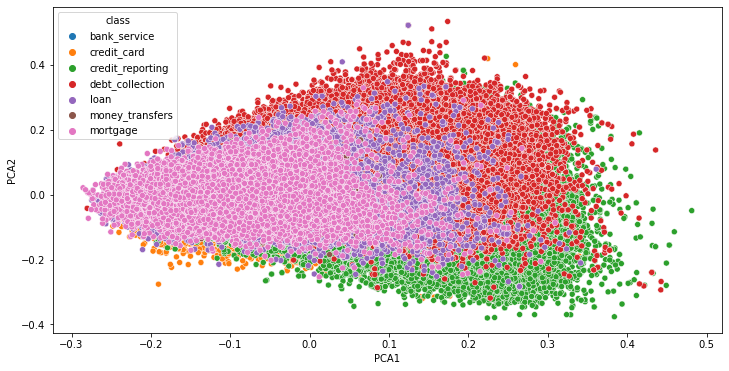

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tfv = TfidfVectorizer(min_df=3, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english', vocabulary = top_n_uniques)

text_pca = df_text['clean_text']
tfv.fit(text_pca)
text_pca_tfv =  tfv.transform(text_pca)

X = text_pca_tfv.todense()

reduced_data = PCA(n_components=2).fit_transform(X)

my_palette = {"bank_service": "tab:blue", "credit_card": "tab:orange", "credit_reporting":"tab:green",
                  "debt_collection":"tab:red", "loan":"tab:purple" ,"money_transfers":"tab:brown" ,
                  "mortgage":"tab:pink"
                 }

clss = df_text['product_group'].values.reshape(len(df_text),1)
X_pca = pd.DataFrame(np.hstack((reduced_data,clss)), columns = ['PCA1', 'PCA2','class'])

# this was with 1000 features
X_pca['color'] = X_pca['class'].map(my_palette)

plt.figure(figsize = (12,6))
sns.scatterplot(data=X_pca, x='PCA1', y='PCA2', hue='class');

# C. Model Building

In [ ]:
"""
To begin the model building step - we will start with Multinomial Naive Bayes and Logistic Regression as baseline

Next we will move on to build better models

Also, we will use GridSearch and / or RandomSearch for hyperparameter tuning to find best models

Finally we will evaluate the models on the basis of F1 score and also look at the  AUC and ROC and PR plots
"""

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

models = [MultinomialNB()
          , LogisticRegression(random_state=43)
          , DecisionTreeClassifier()
#           ,LinearSVC()
         ]


corpus = df_text['clean_text']
dic_tfv, tfv, text_tfv_reduced = run_TFIDF(corpus,custom_stopwords=False, vocabs = top_n_uniques)
    
features_reduced = text_tfv_reduced.toarray()
print(features_reduced.shape)
product_groups_y = df_text['product_group'].values

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    
    print("fitting %s model ... " %str(model_name))
    accuracies = cross_val_score(model, text_tfv_reduced, product_groups_y, scoring='accuracy', cv=CV)
    print("%s model has accruacy = " %str(model_name), accuracies)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Creating TF-IDF based on MonoGram and BiGram only due to computation limitations...
Limiting maximum features to 2541 in TF-IDF only due to computation limitations...
fitting TF-IDF ...
transforming TF-IDF ...
(268343, 2541)
fitting MultinomialNB model ... 
MultinomialNB model has accruacy =  [0.81113865 0.81057966 0.80655499 0.81016621 0.81120966]
fitting LogisticRegression model ... 
LogisticRegression model has accruacy =  [0.84764016 0.8456092  0.8435596  0.84555042 0.84966833]
fitting DecisionTreeClassifier model ... 
DecisionTreeClassifier model has accruacy =  [0.76328979 0.76383014 0.76334569 0.75978237 0.76078855]


Mean Accuracy  Standard deviation
model_name                                               
DecisionTreeClassifier       0.762207            0.001802
LogisticRegression           0.846406            0.002326
MultinomialNB                0.809930            0.001934

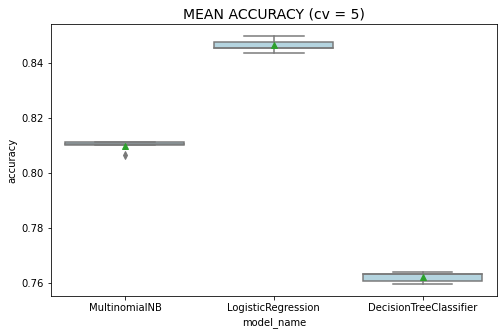

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)", size=14);

In [37]:
# !pip uninstall tensorflow 
# !pip install tensorflow

In [35]:
# import nltk
# import tensorflow as tf
# import keras

# C. II. Hyperparameter Tuning

<b> <i> Creating functions for hyperparameters training </b> </i>
 
====================================================
- <b> do_classify : </b> This function performs classification using the best hyperparameters, which are determined using cv_optimize and then tests the model on the test set. This function prints the training and test accuracy of the classifier and plots the confusion matrix

- <b> cv_optimize : </b> This function perform cross-validation using Grid search and is used for hyperparameter tuning and model selection. This function is called in the do_classify function which performs the classification

- <b> plot_confusion_matrix : </b> This function plots the confusion matrix

- <b> make_pr : </b> This function plots the Precision-Recall curve and also prints the AP(Average Precision)

In [9]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """    
    Parameters
    ------------------------
    cm              : The confusion matrix to be plotted
    normalization   : A boolean value for normalizing the values in confusion matrix
    title           : Title of the plot
    cmap            : The color map to be used
    
    Returns
    -------------------------
    Plots the confusion matrix.
    
    PS-This function in called in do_classify.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###############################################################################################    

def make_pr(name, clf, ytest, xtest, ax=None):
    
    """
    Parameters
    ------------------------
    name  : Name of the classifier in strings
    clf   : The tuned classifier
    ytest : The true responses in the test set
    xtest : Features of the test set
    ax    : The number of PR curves to print
    
    
    Returns
    -------------------------
    ax: Plots the PR curve along with AP value.
    
    PS: Code taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
   
    average_precision = average_precision_score(ytest, clf.predict_proba(xtest)[:,1])
    
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(xtest)[:,1])

    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
    

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, make_scorer

def cv_optimize(clf, parameters, X, y, n_jobs=-1, n_folds=5):
    
    """ 
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    X            : Dataframe of features
    y            : A Dataframe of responses/target
    n_jobs       : Parameter for number of cores to engage when performing cv
    n_folds      : The number of cv folds
    
    
    Returns
    -------------------------
    best : The best hyperparameters for the classifier
    """
    
    skf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state = 999)
    
    gs = GridSearchCV(clf, param_grid=parameters, cv=skf.split(X,y), n_jobs=n_jobs, 
                          scoring=f1, verbose=10)
    
    gs.fit(X, y)
    
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    
    print("="*100)
    print(gs.cv_results_['mean_test_score'])
    print("="*100)
    
    best = gs.best_estimator_
    
    return best

#######################################################################################


def rv_optimize(clf, parameters, X, y, n_jobs=-1, n_folds=5):
    
    """ 
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    X            : Dataframe of features
    y            : A Dataframe of responses/target
    n_jobs       : Parameter for number of cores to engage when performing cv
    n_folds      : The number of cv folds
    
    
    Returns
    -------------------------
    best : The best hyperparameters for the classifier
    """
    
    skf = StratifiedKFold(n_splits=n_folds, shuffle = True, random_state = 999)
    
    rs = RandomizedSearchCV(clf, param_distributions=parameters, cv=skf.split(X,y), n_jobs=n_jobs, 
                          scoring=f1, verbose=10)
    
    rs.fit(X, y)
    
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    
    best = gs.best_estimator_
    
    return best

#######################################################################################

def do_classify(clf, parameters, Xtrain,Xtest,ytrain,ytest, n_folds=5, 
                n_jobs=-1):
    """
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    Xtrain       : Train Dataframe of features
    Xtest        : Test Dataframe of features
    ytrain       : Train Dataframe of responses/target
    ytest        : Test Dataframe of responses/target
    n_jobs       : Parameter for number of cores to engage when performing cv
    n_folds      : The number of cv folds
    
    
    Returns
    -------------------------
    clf          : The classifier with optimized hyperparameters
    Xtrain       : The Train Dataframe of features
    Xtest        : The Test Dataframe of features
    ytrain       : The Train Dataframe of responses/target
    ytest        : The Test Dataframe of responses/target
    
    Prints the training and test accuracy.
    Plots the confusion matrix.
    """
    #performing grid search to find best hyperparameters
    
    f1 = make_scorer(f1_score,average='weighted')

    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds)
    
    # Fitting the tuned classifier
    clf=clf.fit(Xtrain, ytrain)
    
    # Calculating the training accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    
    # Calculating the test accuracy
    test_accuracy = clf.score(Xtest, ytest)
    
        
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    
    #Calculating the confusion matrix
    cnf_matrix = confusion_matrix(ytest, clf.predict(Xtest))
    np.set_printoptions(precision=3)
    
    plt.figure()
    
    #Plotting the confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
    plt.show()
    print ("########################################################")
    
    return clf, Xtrain, ytrain, Xtest, ytest



def tune_classifier(clf, parameters, Xtrain,Xtest,ytrain,ytest, n_folds=5, 
                n_jobs=-1, tuning='GridSearch'):
    """
    Parameters
    ------------------------
    clf          : The classifier
    parameters   : A dictionary of parameters on which grid search is to be performed
    Xtrain       : Train Dataframe of features
    Xtest        : Test Dataframe of features
    ytrain       : Train Dataframe of responses/target
    ytest        : Test Dataframe of responses/target
    n_jobs       : Parameter for number of cores to engage when performing cv
    n_folds      : The number of cv folds
    
    
    Returns
    -------------------------
    clf          : The classifier with optimized hyperparameters
    Xtrain       : The Train Dataframe of features
    Xtest        : The Test Dataframe of features
    ytrain       : The Train Dataframe of responses/target
    ytest        : The Test Dataframe of responses/target
    
    Prints the training and test accuracy.
    Plots the confusion matrix.
    """
    #performing grid search to find best hyperparameters
    
    f1 = make_scorer(f1_score,average='weighted')

    if parameters:
        if tuning=='GridSearch':
            clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds)
        elif tuning=='RandomSearch':
            clf = rv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds)
    
    # Fitting the tuned classifier
    clf=clf.fit(Xtrain, ytrain)
    
    # Calculating the training accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    
    # Calculating the test accuracy
    test_accuracy = clf.score(Xtest, ytest)
    
        
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    
    #Calculating the confusion matrix
    cnf_matrix = confusion_matrix(ytest, clf.predict(Xtest))
    np.set_printoptions(precision=3)
    
    plt.figure()
    
    #Plotting the confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
    plt.show()
    print ("########################################################")
    
    return clf, Xtrain, ytrain, Xtest, ytest

- Creating TF-IFD features for hyperparameter tuning
- Train and Test / Validation Splitting at 80-20 ratio

In [11]:
vectorizer = TfidfVectorizer(min_df=3,  max_features=10000, 
                             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                             ngram_range=(1, 1), use_idf=1,smooth_idf=1,sublinear_tf=1,
                             stop_words = 'english', vocabulary = top_n_uniques)


corpus = df_text['clean_text']
X = vectorizer.fit_transform(corpus)
Y = df_text['product_group'].values
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, random_state=43, test_size=0.2)

In [12]:
#Creating a f1 scoring function
f1 = make_scorer(f1_score,average='weighted')

############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
Confusion matrix, without normalization
[[ 3107   454   198    84    44    47   130]
 [  294  4533   731   302   132    17    60]
 [   63   394 13829   996   491     4   273]
 [   52   246  1739  9397   464     1   228]
 [  129   198   582   638  4551     1   208]
 [  233   100    19    22     9   542    21]
 [   73    64   254   147    70     2  7496]]


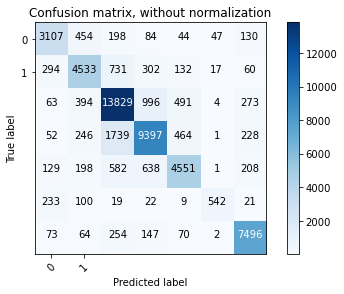

########################################################


(MultinomialNB(),
 <214674x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 9090335 stored elements in Compressed Sparse Row format>,
 array(['mortgage', 'mortgage', 'debt_collection', ..., 'credit_card',
        'mortgage', 'debt_collection'], dtype=object),
 <53669x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 2288391 stored elements in Compressed Sparse Row format>,
 array(['loan', 'bank_service', 'mortgage', ..., 'credit_reporting',
        'debt_collection', 'mortgage'], dtype=object))

In [19]:
from sklearn.naive_bayes import MultinomialNB

parameters = None
tune_classifier(MultinomialNB(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.804   nan 0.839   nan 0.845   nan 0.842   nan 0.842   nan 0.841   nan]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BEST {'C': 1, 'penalty': 'l2'} 0.8448657148502596 {'mean_fit_time': array([20.604,  0.734, 30.495,  0.2  , 30.935,  0.167, 32.359,  0.22 ,
       34.12 ,  0.379, 31.514,  0.395]), 'std_fit_time': array([0.401, 0.214, 0.285, 0.063, 0.552, 0.052, 1.386, 0.074, 0.545,
       0.098, 2.928, 0.295]), 'mean_score_time': array([0.602, 0.   , 0.662, 0.   , 0.68 , 0.   , 0.74 , 0.   , 0.792,
       0.   , 0.474, 0.   ]), 'std_score_time': array([0.035, 0.   , 0.045, 0.   , 0.03 , 0.   , 0.037, 0.   , 0.106,
       0.   , 0.111, 0.   ]), 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100, 1000,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2',
                   'l1', 'l2', 'l1'],
             mask=[False, False, False, False, False, Fals

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.85
Confusion matrix, without normalization
[[ 3373   304    88    76    43    92    88]
 [  285  4879   470   295    79    36    25]
 [   85   373 13878  1072   419     1   222]
 [   66   231  1099 10129   432     8   162]
 [   89   114   473   539  4978     5   109]
 [  165    49    15    12    14   681    10]
 [   69    32   198   155   110     0  7542]]


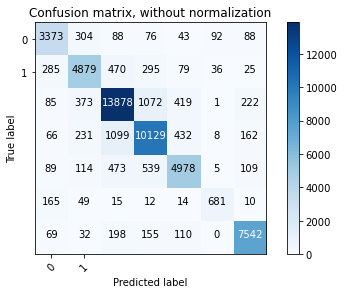

########################################################


(LogisticRegression(C=1),
 <214674x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 9090335 stored elements in Compressed Sparse Row format>,
 array(['mortgage', 'mortgage', 'debt_collection', ..., 'credit_card',
        'mortgage', 'debt_collection'], dtype=object),
 <53669x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 2288391 stored elements in Compressed Sparse Row format>,
 array(['loan', 'bank_service', 'mortgage', ..., 'credit_reporting',
        'debt_collection', 'mortgage'], dtype=object))

In [20]:
from sklearn.linear_model import LogisticRegression

parameters = {"C": [0.01, 0.1, 1, 10, 100, 1000],
             "penalty":['l2','l1']}
tune_classifier(LogisticRegression(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
BEST {'max_depth': 19, 'n_estimators': 200} 0.7848799945334557 {'mean_fit_time': array([   6.242,   10.645,   15.135,   21.344,    8.255,   16.305,
         21.484,   27.439,    9.195,   17.833,   24.906,   33.787,
         11.528,   22.207,   28.96 ,   41.899,   13.749,   26.519,
         39.424,   52.867,   16.394,   31.104,   45.369,   58.707,
         18.539,   34.822,   53.115,   73.064,   22.69 ,   48.411,
         68.117,   85.613,   25.906,   50.298,   73.678,   98.405,
         29.824,   59.432,   94.339,  132.514,   41.436,   84.164,
        130.453,  173.004,   52.479,  106.209,  153.969,  190.181,
         54.664,   97.121,  142.595,  189.314,   57.269,  112.111,
        164.947,  910.348,  468.405,  689.832, 1029.748, 1371.134,
        350.237, 1054.979, 1286.074, 1577.353,  417.865,  953.146,
       1307.631, 1786.091,  484.811, 1030.83 , 1454.884, 1598.032]), 'std_fit_time': array([2.313e-01, 2.329e-01, 2.282e

############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.79
Confusion matrix, without normalization
[[ 2885   383   422   206    50     0   118]
 [  188  3953  1294   537    46     0    51]
 [   27   129 14830   763   128     0   173]
 [   48   164  1987  9432   278     0   218]
 [   88   115  1097   812  4011     0   184]
 [  308    98   151   175    11   173    30]
 [   38    24   462   201   132     0  7249]]


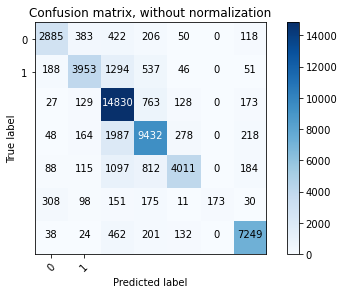

########################################################


(RandomForestClassifier(max_depth=19, n_estimators=200),
 <214674x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 9090335 stored elements in Compressed Sparse Row format>,
 array(['mortgage', 'mortgage', 'debt_collection', ..., 'credit_card',
        'mortgage', 'debt_collection'], dtype=object),
 <53669x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 2288391 stored elements in Compressed Sparse Row format>,
 array(['loan', 'bank_service', 'mortgage', ..., 'credit_reporting',
        'debt_collection', 'mortgage'], dtype=object))

In [26]:
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": [50,100,150,200], "max_depth":range(2,20,1)}
tune_classifier(RandomForestClassifier(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.81
Confusion matrix, without normalization
[[ 3125   377   143   158    71   109    81]
 [  267  4547   665   477    59    29    25]
 [   69   362 13548  1296   488     3   284]
 [   84   275  1282  9852   419     8   207]
 [   95    86   563   694  4767     6    96]
 [  163    45    29    54    10   632    13]
 [   89    28   249   232   295     1  7212]]


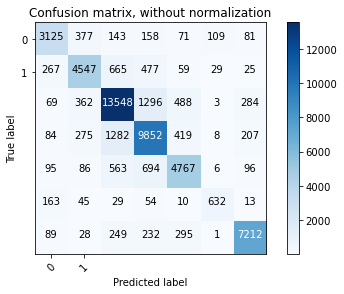

########################################################


(GradientBoostingClassifier(),
 <214674x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 9090335 stored elements in Compressed Sparse Row format>,
 array(['mortgage', 'mortgage', 'debt_collection', ..., 'credit_card',
        'mortgage', 'debt_collection'], dtype=object),
 <53669x2541 sparse matrix of type '<class 'numpy.float64'>'
 	with 2288391 stored elements in Compressed Sparse Row format>,
 array(['loan', 'bank_service', 'mortgage', ..., 'credit_reporting',
        'debt_collection', 'mortgage'], dtype=object))

In [90]:
parameters = None

tune_classifier(GradientBoostingClassifier(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

In [22]:
parameters = None

tune_classifier(GradientBoostingClassifier(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = None
tune_classifier(GradientBoostingClassifier(),parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1)

KeyboardInterrupt: 

In [ ]:
tune_classifier(GradientBoostingClassifier(max_depth=8, n_estimators = 200, learning_rate = 0.1)
                ,parameters, x_train, x_valid ,y_train,y_valid,n_folds=5, 
                n_jobs=-1,tuning='RandomSearch')

# C.III. Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

def final_model(clf):
    
    ## train classifier
    model = clf.fit(x_train, y_train)
    predicted_train = model.predict(x_train)
    
    ## test on validation
    predicted = model.predict(x_valid)
    predicted_prob = model.predict_proba(x_valid)
    
    classes = np.unique(y_valid)
    y_valid_array = pd.get_dummies(y_valid, drop_first=False).values
    

    ## Accuracy, Precision, Recall
    
    accuracy_train = accuracy_score(y_train, predicted_train)
    accuracy = accuracy_score(y_valid, predicted)
    auc = roc_auc_score(y_valid, predicted_prob, multi_class="ovr")
    print("Accuracy on training:",  round(accuracy_train,2))
    print("Accuracy on testing:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(classification_report(y_valid, predicted))

    ## Plot confusion matrix
    cm = confusion_matrix(y_valid, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(1,2, figsize = (20,5))
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_valid_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_valid_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()
    
    return model

Accuracy on training: 0.81
Accuracy on testing: 0.81
Auc: 0.96
Detail:
                  precision    recall  f1-score   support

    bank_service       0.79      0.76      0.78      4064
     credit_card       0.76      0.75      0.75      6069
credit_reporting       0.80      0.86      0.83     16050
 debt_collection       0.81      0.77      0.79     12127
            loan       0.79      0.72      0.75      6307
 money_transfers       0.88      0.57      0.69       946
        mortgage       0.89      0.92      0.91      8106

        accuracy                           0.81     53669
       macro avg       0.82      0.77      0.79     53669
    weighted avg       0.81      0.81      0.81     53669



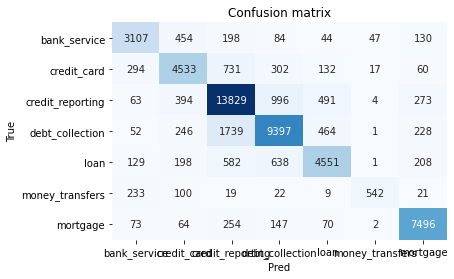

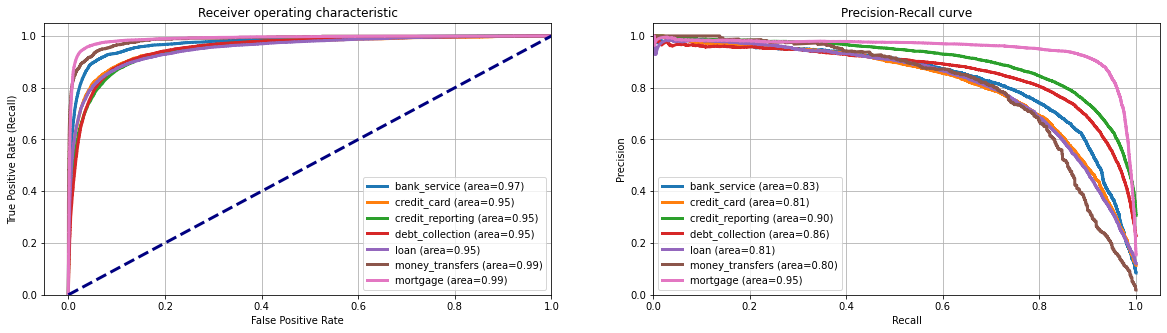

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


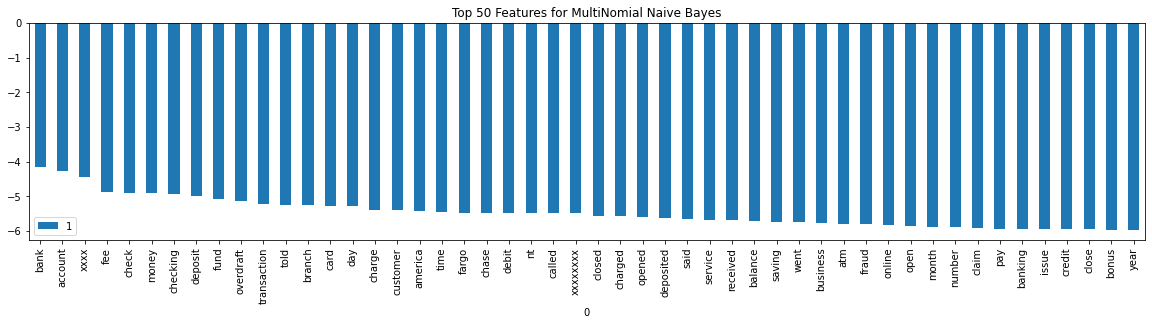

In [14]:
mnb = final_model(MultinomialNB())

feature_names = vectorizer.get_feature_names()
coefs_mnb = sorted(zip(feature_names, mnb.coef_[0]), key = lambda x: x[1], reverse=True)

fig, axs = plt.subplots(figsize=(20,4))
a = pd.DataFrame(coefs_mnb[:50])
a.set_index(0, inplace = True)
a.plot.bar(ax=axs)
axs.set_title('Top 50 Features for MultiNomial Naive Bayes')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training: 0.86
Accuracy on testing: 0.85
Auc: 0.98
Detail:
                  precision    recall  f1-score   support

    bank_service       0.82      0.83      0.82      4064
     credit_card       0.82      0.80      0.81      6069
credit_reporting       0.86      0.86      0.86     16050
 debt_collection       0.83      0.84      0.83     12127
            loan       0.82      0.79      0.80      6307
 money_transfers       0.83      0.72      0.77       946
        mortgage       0.92      0.93      0.93      8106

        accuracy                           0.85     53669
       macro avg       0.84      0.83      0.83     53669
    weighted avg       0.85      0.85      0.85     53669



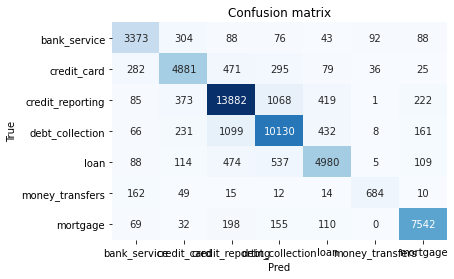

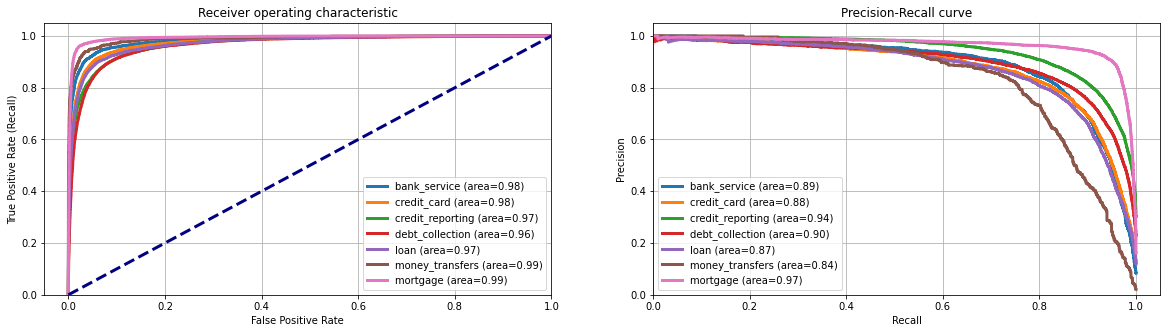

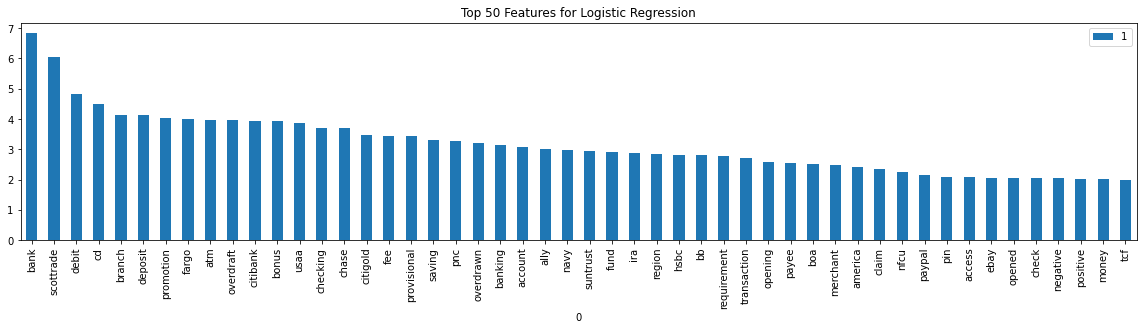

In [15]:
lr = final_model(LogisticRegression(C=1, penalty='l2'))

feature_names = vectorizer.get_feature_names()
coefs_lr = sorted(zip(feature_names, lr.coef_[0]), key = lambda x: x[1], reverse=True)

fig, axs = plt.subplots(figsize=(20,4))
a = pd.DataFrame(coefs_lr[:50])
a.set_index(0, inplace = True)
a.plot.bar(ax=axs)
axs.set_title('Top 50 Features for Logistic Regression')
plt.show()

In [ ]:
from sklearn.ensemble import DecisionTreeClassifier
final_model(DecisionTreeClassifier())

Accuracy on training: 0.83
Accuracy on testing: 0.79
Auc: 0.96
Detail:
                  precision    recall  f1-score   support

    bank_service       0.80      0.72      0.76      4064
     credit_card       0.81      0.65      0.72      6069
credit_reporting       0.74      0.92      0.82     16050
 debt_collection       0.78      0.78      0.78     12127
            loan       0.86      0.64      0.73      6307
 money_transfers       0.99      0.17      0.29       946
        mortgage       0.90      0.90      0.90      8106

        accuracy                           0.79     53669
       macro avg       0.84      0.68      0.71     53669
    weighted avg       0.80      0.79      0.79     53669



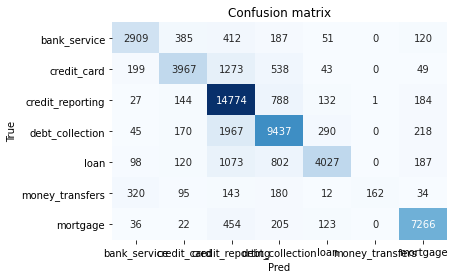

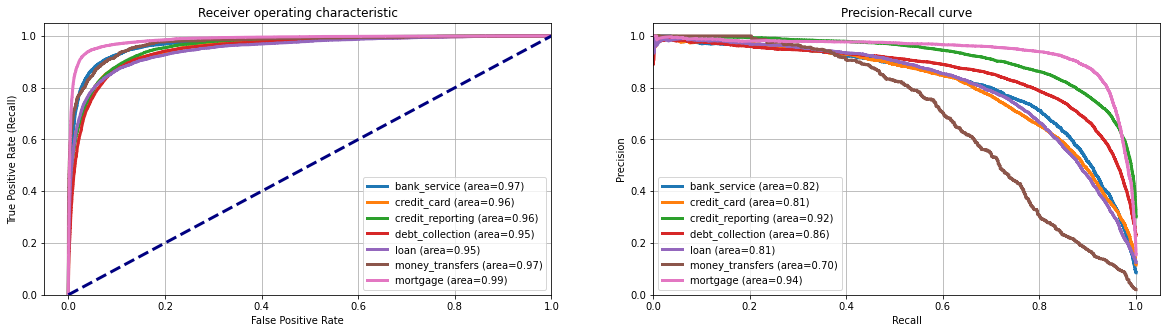

NameError: name 'ax' is not defined

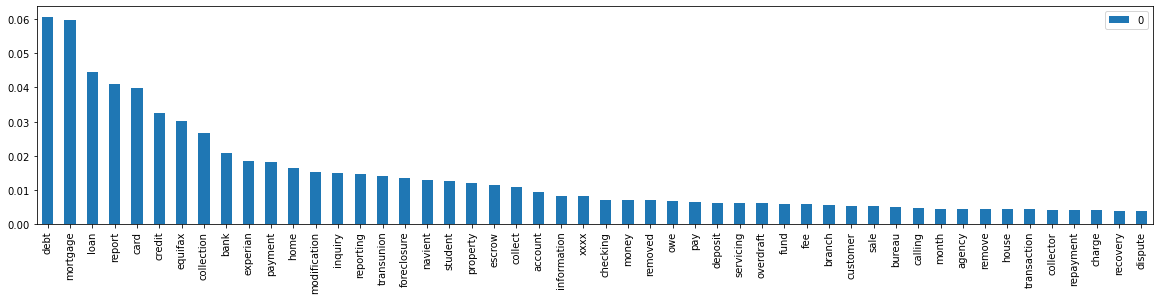

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = final_model(RandomForestClassifier(n_estimators=200, max_depth=19, random_state=43))
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, axs = plt.subplots(figsize=(20,4))
pd.DataFrame(forest_importances).sort_values(by = 0,ascending=False)[:50].plot.bar(ax=axs)
ax.set_title("Feature importances using MDI")

Accuracy on training: 0.82
Accuracy on testing: 0.81
Auc: 0.97
Detail:
                  precision    recall  f1-score   support

    bank_service       0.80      0.77      0.79      4064
     credit_card       0.79      0.75      0.77      6069
credit_reporting       0.82      0.84      0.83     16050
 debt_collection       0.77      0.81      0.79     12127
            loan       0.78      0.76      0.77      6307
 money_transfers       0.81      0.67      0.73       946
        mortgage       0.91      0.89      0.90      8106

        accuracy                           0.81     53669
       macro avg       0.81      0.79      0.80     53669
    weighted avg       0.81      0.81      0.81     53669



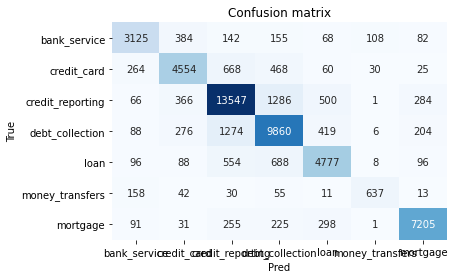

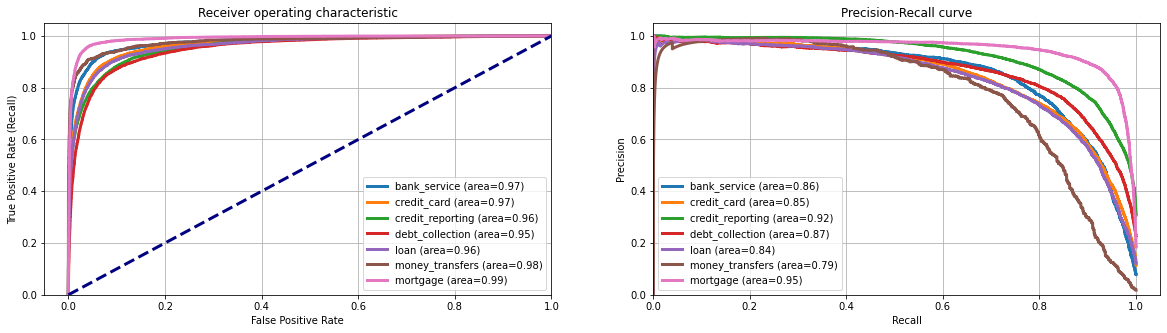

GradientBoostingClassifier()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

parameter = None
#learning_rate=0.1, n_estimators=100, max_depth=3
final_model(GradientBoostingClassifier())

# D. Conclusion

In [ ]:
"""
Out of all the models tested - Logistic Regression showed the most promising performance

Gradient Boosting model also showed high potential - However, due to limitation of time
GBM model could not be tuned to generate the best performance - this can be addressed in future work

Moreover, more advanced techniques using word-embedding and sequence model such as LSTM NN
can be tested in future. As an alternative, we tested the performance on a basic LSTM model and found
it to be very powerful!

However, based on the performance of the model using Logistic Regression 
we are quite comfortable. Moreover, logistic regression model provides better explainability 
and overall persimonious. Therefore, Logistic Regression model is the "Chamption Model" for this project
"""

# Thank You

In [ ]:
"""
Thank you for taking the time to go over the work and I appreciate your time and considerations

"""